<a href="https://colab.research.google.com/github/miguelruor/GeneticEvolution/blob/main/GeneticEvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we model genetic evolution via two models: continuous-time random walks and quantum walks  (Venegas-Andraca 2012), both over a given genotype space (Wagner, 2011). This work is an extension of Santiago et al. 2021. 

We compute hitting times to novel phenotypes in both models in every simulation.

# Libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import expm
from scipy.sparse import csr_matrix
from scipy.linalg import norm
from scipy.sparse.linalg import expm_multiply
from scipy.stats import expon
import seaborn as sns
import pandas as pd
import json
import uuid
import datetime

In [2]:
from pathlib import Path

# Function to read all name files in a folder
def ls(ruta = Path.cwd()): 
    return [arch.name for arch in Path(ruta).iterdir() if arch.is_file()]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importation of graphs and global variables

In [4]:
dir_file_2phen = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_2phen/genotype_space/gspace.gml"
dir_file_4phen = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/genotype_space/gspace.gml"

In [5]:
gspace_2phen = nx.read_gml(dir_file_2phen, label='id')
gspace_4phen = nx.read_gml(dir_file_4phen, label='id')

In [6]:
url_data_visualization = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/data visualization/"

In [7]:
url_evolution_paths = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/QW_evolution_paths.csv"
url_simulations_results = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/QW_simulations_results.csv"
url_parameters = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/QW_parameters.csv"

In [8]:
url_parameters_c = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/CW_parameters.csv"
url_evolution_paths_c = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/CW_evolution_paths.csv"
url_simulations_results_c = "/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/CW_simulations_results.csv"

# Read results

In [9]:
#parameters = pd.DataFrame(columns=['initial_phen', 'initial_gen', 'initial_gen_index', 'max_measurements', 'measurement_rate', 'transition_rate', 'max_simulation_time])

In [10]:
#estimations_results = pd.DataFrame(columns=['tau_Ascl2_prom (seconds)', 'tau_Ascl2_prom (days)', 'N_Ascl2_prom', 
#                  'tau_Bbx_prom (seconds)', 'tau_Bbx_prom (days)', 'N_Bbx_prom', 'tau_Mafb_prom (seconds)', 
#                  'tau_Mafb_prom (days)', 'N_Mafb_prom', 'tau_Foxa2_prom (seconds)', 'tau_Foxa2_prom (days)', 'N_Foxa2_prom'])

#simulations_results = pd.DataFrame(columns =['parameters_index', 'tau_Ascl2', "tau_Bbx", "tau_Foxa2", "tau_Mafb", 'N_Ascl2', 
#                  "N_Bbx", "N_Foxa2", "N_Mafb"])

In [11]:
parameters = pd.read_csv(url_parameters, index_col=0)
simulations_results = pd.read_csv(url_simulations_results, index_col=0)
evolution_paths = pd.read_csv(url_evolution_paths, index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
#parameters_c = pd.DataFrame(columns=['initial_phen', 'initial_gen', 'initial_gen_index', 'max_jumps', 'transition_rate', 'max_simulation_time'])

In [13]:
#estimations_results_c = pd.DataFrame(columns=['tau_Ascl2_prom (seconds)', 'tau_Ascl2_prom (days)', 'N_Ascl2_prom', 
#                  'tau_Bbx_prom (seconds)', 'tau_Bbx_prom (days)', 'N_Bbx_prom', 'tau_Mafb_prom (seconds)', 
#                  'tau_Mafb_prom (days)', 'N_Mafb_prom', 'tau_Foxa2_prom (seconds)', 'tau_Foxa2_prom (days)', 'N_Foxa2_prom'])

#simulations_results_c = pd.DataFrame(columns =['parameters_index', 'tau_Ascl2', "tau_Bbx", "tau_Foxa2", "tau_Mafb", 'N_Ascl2', 
#                  "N_Bbx", "N_Foxa2", "N_Mafb"])

In [14]:
parameters_c = pd.read_csv(url_parameters_c, index_col=0)
simulations_results_c = pd.read_csv(url_simulations_results_c, index_col=0)
evolution_paths_c = pd.read_csv(url_evolution_paths_c, index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [15]:
evolution_paths.tail(10)

,simulation id,holding time,accumulated time,genotype index,genotype sequence,Ascl2 freq.,Bbx freq.,Foxa2 freq.,Mafb freq.,is mutation,mutation time,no. measurement
3629386,892,0.792211,59819.665251,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59854.0
3629387,892,0.068565,59819.733816,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59855.0
3629388,892,2.429310,59822.163126,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59856.0
3629389,892,0.953666,59823.116792,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59857.0
3629390,892,0.078105,59823.194897,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59858.0
3629391,892,1.231835,59824.426733,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59859.0
3629392,892,0.560862,59824.987595,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59860.0
3629393,892,0.235334,59825.222929,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59861.0
3629394,892,2.204194,59827.427123,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59862.0
3629395,892,0.365528,59827.792650,0,GCATATGC,1.0,0.0,0.0,0.0,False,-1.0,59863.0


In [16]:
evolution_paths_c.tail(10)

,simulation id,no. jump,holding time,accumulated time,genotype index,genotype sequence,Ascl2 freq.,Bbx freq.,Foxa2 freq.,Mafb freq.
1094568,226,2,1.916960e+05,2.823102e+05,65,GCAGATGA,1.0,0.0,0.0,0.0
1094569,226,3,2.846768e+05,5.669870e+05,55,GCAGCTGA,1.0,0.0,0.0,0.0
1094570,226,4,8.596358e+04,6.529506e+05,8,ACAGCTGA,1.0,0.0,0.0,0.0
1094571,226,5,9.359504e+04,7.465457e+05,9,TCAGCTGA,1.0,0.0,0.0,0.0
1094572,226,6,2.190897e+05,9.656353e+05,49,CCAGCTGA,1.0,0.0,0.0,0.0
1094573,226,7,1.458852e+05,1.111521e+06,67,CCAGCTGC,1.0,0.0,0.0,0.0
1094574,227,0,0.000000e+00,0.000000e+00,0,GCATATGC,1.0,0.0,0.0,0.0
1094575,227,1,1.317608e+06,1.317608e+06,66,GCAGATGC,1.0,0.0,0.0,0.0
1094576,228,0,0.000000e+00,0.000000e+00,0,GCATATGC,1.0,0.0,0.0,0.0
1094577,228,1,1.115135e+06,1.115135e+06,66,GCAGATGC,1.0,0.0,0.0,0.0


# Identifying genotype networks

### Maximum number of steps to find a novel phenotype

In [ ]:
gspace_2phen.nodes[0].keys()

dict_keys(['label', 'sequence', 'phenotypeName', 'phenotypeIndex', 'node_novelPhen', 'steps_novelPhen', 'nodes_novelPhen'])

In [ ]:
gspace_2phen.nodes[0]['steps_novelPhen']

1

In [ ]:
maxSteps = 0

for v in gspace_4phen.nodes:
  if gspace_4phen.nodes[v]['steps_novelPhen'] != 'infinity' and gspace_4phen.nodes[v]['steps_novelPhen'] > maxSteps:
    maxSteps = gspace_4phen.nodes[v]['steps_novelPhen']
  
maxSteps

5

In [ ]:
maxSteps_2 = 0

for v in gspace_2phen.nodes:
  if gspace_2phen.nodes[v]['steps_novelPhen'] != 'infinity' and gspace_2phen.nodes[v]['steps_novelPhen'] > maxSteps_2:
    maxSteps_2 = gspace_2phen.nodes[v]['steps_novelPhen']
  
maxSteps_2

8

Genotypes at n steps away from a novel phenotype, n=1,2,3,..., maxSteps (four phenotype graph)

In [ ]:
vertex_nSteps = {}
for n in range(1, maxSteps+1):
  vertex_nSteps[n] = []
vertex_nSteps['infinity'] = []

for v in gspace_4phen.nodes:
  vertex_nSteps[gspace_4phen.nodes[v]['steps_novelPhen']].append(v)

In [ ]:
for i in vertex_nSteps:
  print("Nodos a", i, "pasos de encontrar un nuevo fenotipo: ", len(vertex_nSteps[i]))

Nodos a 1 pasos de encontrar un nuevo fenotipo:  254
Nodos a 2 pasos de encontrar un nuevo fenotipo:  205
Nodos a 3 pasos de encontrar un nuevo fenotipo:  99
Nodos a 4 pasos de encontrar un nuevo fenotipo:  18
Nodos a 5 pasos de encontrar un nuevo fenotipo:  3
Nodos a infinity pasos de encontrar un nuevo fenotipo:  0


Genotypes at n steps away from a novel phenotype, n=1,2,3,..., maxSteps (two phenotype graph)

In [ ]:
vertex_nSteps_2 = {}
for n in range(1, maxSteps_2+1):
  vertex_nSteps_2[n] = []
vertex_nSteps_2['infinity'] = []

for v in gspace_2phen.nodes:
  vertex_nSteps_2[gspace_2phen.nodes[v]['steps_novelPhen']].append(v)

In [ ]:
for i in vertex_nSteps_2:
  print("Nodos a", i, "pasos de encontrar un nuevo fenotipo: ", len(vertex_nSteps_2[i]))

Nodos a 1 pasos de encontrar un nuevo fenotipo:  87
Nodos a 2 pasos de encontrar un nuevo fenotipo:  136
Nodos a 3 pasos de encontrar un nuevo fenotipo:  114
Nodos a 4 pasos de encontrar un nuevo fenotipo:  36
Nodos a 5 pasos de encontrar un nuevo fenotipo:  12
Nodos a 6 pasos de encontrar un nuevo fenotipo:  6
Nodos a 7 pasos de encontrar un nuevo fenotipo:  4
Nodos a 8 pasos de encontrar un nuevo fenotipo:  1
Nodos a infinity pasos de encontrar un nuevo fenotipo:  0


### Identifying genotype networks

In [ ]:
phenIndex_4phen = {'Ascl2': 0, 'Bbx': 1, 'Foxa2': 2, 'Mafb': 3}
phenIndex_2phen = {'Bbx': 0, 'Foxa2': 1}

In [ ]:
genotype_networks_4phen = {'Ascl2': {}, 'Bbx': {}, 
                           'Foxa2': {}, 'Mafb': {}}
genotype_networks_2phen = {'Bbx': {}, 'Foxa2': {}}

In [ ]:
for phen in phenIndex_4phen:
  genotype_networks_4phen[phen]['phenotype'] = phen
  genotype_networks_4phen[phen]['phenotype_id'] = phenIndex_4phen[phen]
  genotype_networks_4phen[phen]['nodes'] = []
  genotype_networks_4phen[phen]['total_nodes'] = 0

for phen in phenIndex_2phen:
  genotype_networks_2phen[phen]['phenotype'] = phen
  genotype_networks_2phen[phen]['phenotype_id'] = phenIndex_2phen[phen]
  genotype_networks_2phen[phen]['nodes'] = []
  genotype_networks_2phen[phen]['total_nodes'] = 0

In [ ]:
for v in gspace_4phen.nodes:
  for phen in gspace_4phen.nodes[v]['phenotypeName']:
    genotype_networks_4phen[phen]['nodes'].append(v)
    genotype_networks_4phen[phen]['total_nodes'] += 1

for v in gspace_2phen.nodes:
  for phen in gspace_2phen.nodes[v]['phenotypeName']:
    genotype_networks_2phen[phen]['nodes'].append(v)
    genotype_networks_2phen[phen]['total_nodes'] += 1

In [ ]:
print(genotype_networks_2phen['Foxa2']['total_nodes'])
print(genotype_networks_2phen['Bbx']['total_nodes'])
print(len(gspace_2phen.nodes))
print(len(set(genotype_networks_2phen['Foxa2']['nodes']).intersection(set(genotype_networks_2phen['Bbx']['nodes']))))

325
71
396
0


In [ ]:
print(genotype_networks_4phen['Mafb']['total_nodes'])
print(genotype_networks_4phen['Ascl2']['total_nodes'])
print(genotype_networks_4phen['Foxa2']['total_nodes'])
print(genotype_networks_4phen['Bbx']['total_nodes'])
print(len(gspace_4phen.nodes))

112
76
328
74
579


In [ ]:
genotype_networks_4phen['Mafb'].keys()

dict_keys(['phenotype', 'phenotype_id', 'nodes', 'total_nodes'])

In [ ]:
genotype_networks_4phen

{'Ascl2': {'nodes': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75],
  'phenotype': 'Ascl2',
  'phenotype_id': 0,
  'total_nodes': 76},
 'Bbx': {'nodes': [76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,


In [ ]:
gspace_4phen.nodes[0].keys()

dict_keys(['label', 'sequence', 'phenotypeName', 'phenotypeIndex', 'node_novelPhen', 'steps_novelPhen', 'nodes_novelPhen'])

### Vertex at n steps to find a novel phenotype in every phenotype

In [ ]:
for phen in phenIndex_4phen:
  for n in vertex_nSteps:
    vertex_nSteps_phen = set(vertex_nSteps[n]).intersection(set(genotype_networks_4phen[phen]['nodes']))
    print("Nodes in genotype network of", phen, "at", n, "steps from novel phenotype:", len(vertex_nSteps_phen))

Nodes in genotype network of Ascl2 at 1 steps from novel phenotype: 4
Nodes in genotype network of Ascl2 at 2 steps from novel phenotype: 19
Nodes in genotype network of Ascl2 at 3 steps from novel phenotype: 36
Nodes in genotype network of Ascl2 at 4 steps from novel phenotype: 15
Nodes in genotype network of Ascl2 at 5 steps from novel phenotype: 2
Nodes in genotype network of Ascl2 at infinity steps from novel phenotype: 0
Nodes in genotype network of Bbx at 1 steps from novel phenotype: 38
Nodes in genotype network of Bbx at 2 steps from novel phenotype: 27
Nodes in genotype network of Bbx at 3 steps from novel phenotype: 8
Nodes in genotype network of Bbx at 4 steps from novel phenotype: 1
Nodes in genotype network of Bbx at 5 steps from novel phenotype: 0
Nodes in genotype network of Bbx at infinity steps from novel phenotype: 0
Nodes in genotype network of Foxa2 at 1 steps from novel phenotype: 147
Nodes in genotype network of Foxa2 at 2 steps from novel phenotype: 131
Nodes in 

In [ ]:
for phen in phenIndex_2phen:
  for n in vertex_nSteps_2:
    vertex_nSteps_phen = set(vertex_nSteps_2[n]).intersection(set(genotype_networks_2phen[phen]['nodes']))
    print("Nodes in genotype network of", phen, "at", n, "steps from novel phenotype:", len(vertex_nSteps_phen))

Nodes in genotype network of Bbx at 1 steps from novel phenotype: 37
Nodes in genotype network of Bbx at 2 steps from novel phenotype: 25
Nodes in genotype network of Bbx at 3 steps from novel phenotype: 8
Nodes in genotype network of Bbx at 4 steps from novel phenotype: 1
Nodes in genotype network of Bbx at 5 steps from novel phenotype: 0
Nodes in genotype network of Bbx at 6 steps from novel phenotype: 0
Nodes in genotype network of Bbx at 7 steps from novel phenotype: 0
Nodes in genotype network of Bbx at 8 steps from novel phenotype: 0
Nodes in genotype network of Bbx at infinity steps from novel phenotype: 0
Nodes in genotype network of Foxa2 at 1 steps from novel phenotype: 50
Nodes in genotype network of Foxa2 at 2 steps from novel phenotype: 111
Nodes in genotype network of Foxa2 at 3 steps from novel phenotype: 106
Nodes in genotype network of Foxa2 at 4 steps from novel phenotype: 35
Nodes in genotype network of Foxa2 at 5 steps from novel phenotype: 12
Nodes in genotype netw

In [ ]:
for v in genotype_networks_4phen['Ascl2']['nodes']:
  if gspace_4phen.nodes[v]['sequence'] == 'CAGCTGAC':
    print(v)

10


In [ ]:
for v in genotype_networks_4phen['Mafb']['nodes']:
  if gspace_4phen.nodes[v]['sequence'] == 'CTGCTGAC':
    print(v)

542


In [ ]:
phenotypes = genotype_networks_4phen.keys()

# Auxiliar functions

In [ ]:
def randomInitialGenotype(gspace, size=1):
  if size == 1:
    return np.random.choice(gspace.nodes)
  else:
    return np.random.choice(gspace.nodes, size=size)

# function that returns a random genotype in a genotype network
def randomInitialGenotypeFromGenotypeNetwork(genotype_network):
  return np.random.choice(genotype_network['nodes'])

# function that returns a random genotype in a genotype network at n steps of finding a novel phenotype
def randomInitialGenotypeNSteps(genotype_network, n):
  return np.random.choice(list(set(vertex_nSteps[n]).intersection(set(genotype_network['nodes'])))) 

def randomPhenotype(phenotypes):
  return np.random.choice(phenotypes)

# index of the sequence given
def sequenceIndex(sequence, gspace):
  for v in gspace.nodes:
    if sequence == gspace.nodes[v]['sequence']:
      return v

Function to obtain the distance between two DNA sequences

In [ ]:
def distance(sequence1, sequence2):
  dist = 0
  N = len(sequence1)

  for i in range(N):
    if sequence1[i] != sequence2[i]:
      dist += 1

  return dist

# Quantum genetic evolution (CTQW)

### Auxiliar functions

Function to obtain the Hamiltonian associated to a given graph and the mutation rate

In [ ]:
def giveMeHamiltonian(G, gamma, typeMatrix="laplacian"):
  # typeMatrix could be "adjacency" to use the adjacency matrix based Hamiltoninan 
  # or "laplacian" (default) to use the Laplacian matrix based Hamiltonian
  # gamma is the mutation rate 

  if typeMatrix == "adjacency":
    A = nx.adjacency_matrix(G)
  else:
    A = nx.laplacian_matrix(G)

  H = -gamma* A

  return H

Function to calculate the i-th canonical vector in $C^n$

In [ ]:
def canonical_vector(i, n):
  # i-esimo vector canonico en C^n
  ei = np.zeros(n)
  ei[i] = 1.0
  return ei

Function to simulate a measurement of the quantum walk

In [ ]:
def measurement(state, basis):
  # state is a vector in C^N

  qprobs = [abs(state[v])**2 for v in basis]
  collapse = np.random.choice(basis, p=qprobs)

  return collapse

In [ ]:
state = [(0.5)**(0.5), (0.5j)**(0.5)]
basis = [0, 1]
print(measurement(state, basis))

0


Read all evolution paths or a list given (deprecated: Now all evolution paths are in one dataset)

In [ ]:
def allEvolutionPaths():
  # return in a dictionary with keys the simulations index and saves the evolution paths
  all_evolution_paths = {}
  files = ls("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/evolution_paths_QW/")

  for file in files:
    all_evolution_paths[int(file[:-4])] = pd.read_csv("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/"
      +"evolution_paths_QW/"+file, index_col=0)
    
  return all_evolution_paths

def evolutionPaths(simulation_indices):
  # return in a dictionary with keys the simulations index and saves the evolution paths
  evolution_paths = {}

  for ind in simulation_indices:
    evolution_paths[ind] = pd.read_csv("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/evolution_paths_QW/"+
                               str(ind)+".csv", index_col=0)
    
  return evolution_paths

## Simulation algorithm

A single simulation

In [ ]:
def simulation_qw(gspace, phenotypes, url_evolution_paths, url_simulations_results):
  global simulations_results
  global parameters_index
  global evolution_paths

  if new_parameters:
    parameters_index = len(parameters)-1

  M = len(gspace.nodes)

  tau = {} # estimation of tau (hitting time) for every phenotype: time it takes quantum walk to find given phenotype

  N = {} # estimation of N: number of measurements the quantum walk takes to find a genotype with a new phenotype

  phenotype_frequency = {} # for saving phenotype frequency in evolution path

  no_measurement = 0
  time = 0
  mutation_time = 0

  #initialization
  for phen in phenotypes:
    tau[phen] = -1
    N[phen] = -1
 
  actual_state = initial_genotype 

  evolution_path_aux = {}
  # phenotypes of actual state
  phenotypes_actual_state = gspace.nodes[actual_state]['phenotypeName']
  # the other phenotypes in genotype space
  phenotypes_actual_state_complement = set(phenotypes).difference(set(phenotypes_actual_state))

  for phen in phenotypes_actual_state:
    evolution_path_aux[phen+" freq."] = 1.0

  for phen in phenotypes_actual_state_complement:
    evolution_path_aux[phen+" freq."] = 0.0

  #evolution_path_aux['simulation id'] = simulations_results.shape[0]
  evolution_path_aux['no. measurement'] = 0
  evolution_path_aux['holding time'] = 0.0
  evolution_path_aux['accumulated time'] = 0.0
  evolution_path_aux['genotype index'] = int(initial_genotype)
  evolution_path_aux['genotype sequence'] = gspace.nodes[initial_genotype]['sequence']
  evolution_path_aux['is mutation'] = False
  evolution_path_aux['mutation time'] = -1

  #evolution_paths = evolution_paths.append(evolution_path_aux, ignore_index=True)
  print(evolution_path_aux)

  variable = 0

  if max_measurements < 0:
    max_variable = max_simulation_time
  else:
    max_variable = max_measurements

  # Start of simulation
  # The following while loop ends when 'variable' is greater or equal than 'max_variable'. 'variable' could be the number of measurements or the accumulated time 
  # of the simulation, depending of the parameters
  while variable < max_variable:
    for phen in phenotypes_actual_state:
      if tau[phen] < 0: # update hitting times of novel phenotypes
        tau[phen] = time
        N[phen] = no_measurement
      
    T = expon.rvs(scale=measurement_rate, size=1)[0] # time between measurements
    mutation_time += T
    time += T

    evolution_path_aux['holding time'] = T
    evolution_path_aux['accumulated time'] = time
    
    # evolving quantum walk
    actual_state_vec = canonical_vector(actual_state, M) # vector representing genotype actual_state
    actual_state_vec = expm_multiply(-1j*T*H, actual_state_vec) # evolve quantum walk until time T with actual_state as initial state
    measurement_result = measurement(actual_state_vec, gspace.nodes)
    no_measurement += 1

    if measurement_result != actual_state:
      evolution_path_aux['is mutation'] = True
      evolution_path_aux['mutation time'] = mutation_time
      mutation_time = 0
    else:
      evolution_path_aux['is mutation'] = False
      evolution_path_aux['mutation time'] = -1

    actual_state = measurement_result

    evolution_path_aux['genotype index'] = actual_state
    evolution_path_aux['genotype sequence'] = gspace.nodes[actual_state]['sequence']

    # phenotypes of actual state
    phenotypes_actual_state = gspace.nodes[actual_state]['phenotypeName']
    # the other phenotypes in genotype space
    phenotypes_actual_state_complement = set(phenotypes).difference(set(phenotypes_actual_state))

    for phen in phenotypes_actual_state:
      evolution_path_aux[phen+" freq."] = (evolution_paths.iloc[-1][phen+" freq."]*(no_measurement-1)+1)/no_measurement

    for phen in phenotypes_actual_state_complement:
      evolution_path_aux[phen+" freq."] = (evolution_paths.iloc[-1][phen+" freq."]*(no_measurement-1))/no_measurement

    evolution_path_aux['no. measurement'] = no_measurement
    #evolution_paths = evolution_paths.append(evolution_path_aux, ignore_index=True)

    if max_measurements < 0:
      variable = time
    else:
      variable = no_measurement
    
    if no_measurement % 1000 == 0:
      print(evolution_path_aux)
      
  # End of simulation
  
  simulations_results_aux = {'parameters_index': int(parameters_index), 'simulation time': time, 'total measurements': no_measurement}

  for phen in phenotypes:
    simulations_results_aux['tau_'+phen] = tau[phen] if tau[phen]>=0.0 else time
    simulations_results_aux['N_'+phen] = N[phen] if N[phen]>=0 else max_measurements

  simulations_results = simulations_results.append(simulations_results_aux, ignore_index=True)
    
  # writing results of simulations  
  #evolution_paths.to_csv(url_evolution_paths)
  simulations_results.to_csv(url_simulations_results)

Different simulations with same initial genotype

Function to perform simulations with random initial genotypes

In [ ]:
def randomSimulations_QW(simulations, gspace, phenotypes, url_parameters, url_evolution_paths, url_simulations_results):
  global parameters
  global initial_genotype
  global initial_sequence
  global initial_phen

  np.random.seed(2021)
  initial_genotypes = randomInitialGenotype(gspace_4phen, simulations)

  for i in range(simulations):
    print("Start of random simulation", i+1,"/",simulations)
    initial_genotype = initial_genotypes[i]
    initial_sequence = gspace.nodes[initial_genotype]['sequence']
    initial_phen = gspace.nodes[initial_genotype]['phenotypeName'][0]

    parameters = parameters.append({'initial_phen': initial_phen, 'initial_gen': initial_sequence, 'initial_gen_index': initial_genotype, 
                                'max_measurements': max_measurements, 'measurement_rate': measurement_rate, 'transition_rate': gamma, 
                                'max_simulation_time': max_simulation_time}, 
                               ignore_index=True)
    parameters.to_csv(url_parameters)

    simulation_qw(gspace, phenotypes, url_evolution_paths, url_simulations_results)

## Simulations

### Parameters

In [ ]:
simulations = 5 # number of simulations
np.random.seed(2021)

In [ ]:
parameters.tail()

,initial_phen,initial_gen,initial_gen_index,max_measurements,measurement_rate,transition_rate,max_simulation_time
267,Bbx,TTCATGAA,116,-1.0,600.0,0.001,1000000
268,Bbx,TTCATGAA,116,-1.0,650.0,0.001,1000000
269,Ascl2,GCATATGC,0,-1.0,1.0,0.001,1000000
270,Ascl2,GCATATGC,0,-1.0,100.0,0.001,1000000
271,Ascl2,GCATATGC,0,-1.0,50.0,0.001,1000000


#### Old parameters

In [ ]:
parameters.tail(20)

,initial_phen,initial_gen,initial_gen_index,max_measurements,measurement_rate,transition_rate,max_simulation_time
250,Mafb,ACCAAAAA,511,-1.0,700.0,0.001,1000000
251,Mafb,ACCAAAAA,511,-1.0,750.0,0.001,1000000
252,Mafb,ACCAAAAA,511,-1.0,800.0,0.001,1000000
253,Mafb,ACCAAAAA,511,-1.0,850.0,0.001,1000000
254,Mafb,ACCAAAAA,511,-1.0,900.0,0.001,1000000
255,Mafb,ACCAAAAA,511,-1.0,950.0,0.001,1000000
256,Mafb,ACCAAAAA,511,-1.0,1000.0,0.001,1000000
257,Mafb,ACCAAAAA,511,-1.0,1050.0,0.001,1000000
258,Mafb,ACCAAAAA,511,-1.0,1100.0,0.001,1000000
259,Mafb,ACCAAAAA,511,-1.0,1150.0,0.001,1000000


In [ ]:
parameters_index = 191

In [ ]:
new_parameters = False
max_measurements = parameters.loc[parameters_index]['max_measurements'] # maximum number of measurements in a simulation. -1 if you want to take into account a maximum simulation time instead
measurement_rate = parameters.loc[parameters_index]['measurement_rate'] # This is equal to the average decoherence time of the system. 
max_simulation_time = parameters.loc[parameters_index]['max_simulation_time'] # maximum simulation time in seconds. -1 if you want to take into account a maximum number of measurements instead
# McFadden and Al-Khalili (1999) estimated that it is between 1-100 seconds or more
gamma = parameters.loc[parameters_index]['transition_rate'] # transition rate between neighbor nodes
initial_phen = parameters.loc[parameters_index]['initial_phen']
initial_genotype = parameters.loc[parameters_index]['initial_gen_index']
print(initial_genotype)
print(gspace_4phen.nodes[initial_genotype]['phenotypeName'])

511
['Mafb']


#### New parameters

Required parameters

In [ ]:
new_parameters = True
max_measurements = -1 # maximum number of measurements in a simulation. -1 if you want to take into account a maximum simulation time instead
max_simulation_time = 10**6 # maximum simulation time in seconds. -1 if you want to take into account a maximum number of measurements instead
measurement_rate = 50 # This is equal to the average decoherence time of the system. 
# McFadden and Al-Khalili (1999) estimated that it is between 1-100 seconds or more
gamma = 10**(-3) # transition rate between neighbor nodes

Optional parameters </br>

You can choose simulations with random initial genotypes with randomSimulations_QW. If this is the case, do not run this cell

In [ ]:
initial_genotype = 0
initial_phen = gspace_4phen.nodes[initial_genotype]['phenotypeName'][0]
initial_sequence = gspace_4phen.nodes[initial_genotype]['sequence']

# Uncomment the following lines if you want to choose a genotype by its sequence. initial_phen must have its phenotype
# initial sequence = "AAAAAAAA"
# initial_genotype = sequenceIndex(initial_sequence)

print(initial_genotype)
print(gspace_4phen.nodes[initial_genotype]['phenotypeName'])

parameters = parameters.append({'initial_phen': initial_phen, 'initial_gen': initial_sequence, 'initial_gen_index': initial_genotype, 
                                'max_measurements': max_measurements, 'measurement_rate': measurement_rate, 'transition_rate': gamma,
                                'max_simulation_time': max_simulation_time}, 
                               ignore_index=True)
parameters.to_csv("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/QW_parameters.csv")

0
['Ascl2']


#### Loading fix parameters

In [ ]:
H = giveMeHamiltonian(gspace_4phen, gamma)
M = gspace_4phen.number_of_nodes() # number of nodes and dimension of Hilbert space

### Simulations

#### Simulation with fixed parameters

In [ ]:
for i in range(simulations):
  print(f'Start of simulation {i+1}/{simulations}')
  simulation_qw(gspace_4phen, genotype_networks_4phen.keys(), url_evolution_paths, url_simulations_results)

Start of simulation 1/5
{'Ascl2 freq.': 1.0, 'Mafb freq.': 0.0, 'Foxa2 freq.': 0.0, 'Bbx freq.': 0.0, 'no. measurement': 0, 'holding time': 0.0, 'accumulated time': 0.0, 'genotype index': 0, 'genotype sequence': 'GCATATGC', 'is mutation': False, 'mutation time': -1}
{'Ascl2 freq.': 0.999, 'Mafb freq.': 0.0, 'Foxa2 freq.': 0.001, 'Bbx freq.': 0.0, 'no. measurement': 1000, 'holding time': 19.576653351616148, 'accumulated time': 49406.66478731017, 'genotype index': 227, 'genotype sequence': 'GTTGTTGA', 'is mutation': False, 'mutation time': -1}
{'Ascl2 freq.': 0.9995, 'Mafb freq.': 0.0, 'Foxa2 freq.': 0.0005, 'Bbx freq.': 0.0, 'no. measurement': 2000, 'holding time': 28.26604251931985, 'accumulated time': 98322.91597140966, 'genotype index': 363, 'genotype sequence': 'ATTATGTA', 'is mutation': False, 'mutation time': -1}
{'Ascl2 freq.': 0.9996666666666667, 'Mafb freq.': 0.0, 'Foxa2 freq.': 0.0003333333333333333, 'Bbx freq.': 0.0, 'no. measurement': 3000, 'holding time': 11.04467501299223,

#### Simulations with random initial genotype

In [ ]:
randomSimulations_QW(simulations, gspace_4phen, genotype_networks_4phen.keys(), url_parameters, url_evolution_paths, 
                  url_simulations_results)
simulations_results

# Classic evolution (CTRW)

### Auxiliar functions

In [ ]:
def infinitesimalGenerator(G, gamma):
  # gamma is the mutation rate 

  A = nx.laplacian_matrix(G)
  H = -gamma* A

  return H

In [ ]:
def nextState(states, i, Q):
  # choose next state to jump to from the i-th row of the jump process transition matrix
  # states are the set of state of the random walk
  # i is the actual state
  # Q is the infinitesimal generator of the continuous random walk
  probs = [-Q[i, j]/Q[i, i] for j in states]
  probs[i] = 0 

  return np.random.choice(states, p = probs)

Read all evolution paths or a given one (deprecated: now all evolution paths are in one dataset)

In [ ]:
def allEvolutionPaths_c():
  # return in a dictionary with keys the simulations index and saves the evolution paths
  all_evolution_paths = {}
  files = ls("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/evolution_paths_CW/")

  for file in files:
    all_evolution_paths[int(file[:-4])] = pd.read_csv("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/evolution_paths_CW/"+
                               file, index_col=0)
    
  return all_evolution_paths

def evolutionPaths_c(simulation_indices):
  evolution_paths = {}

  for ind in simulation_indices:
    evolution_paths[ind] = pd.read_csv("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/evolution_paths_CW/"+
                               str(ind)+".csv", index_col=0)
  
  return evolution_paths

## Simulation algorithm

In [ ]:
def simulation_cw(gspace, phenotypes, url_evolution_paths, url_simulations_results):
  global simulations_results_c
  global parameters_index
  global evolution_paths_c

  if new_parameters:
    parameters_index = len(parameters_c)-1

  tau = {} # estimation of tau (hitting time) for every phenotype: time it takes quantum walk to find given phenotype

  N = {} # estimation of N: number of jumps the random walk takes to find a genotype with a new phenotype

  phenotype_frequency = {} # for saving phenotype frequency in evolution path

  jump = 0
  time = 0
  
  #initialization
  for phen in phenotypes:
    tau[phen] = -1
    N[phen] = -1

  actual_state = initial_genotype 

  evolution_path_aux = {}
  # phenotypes of actual state
  phenotypes_actual_state = gspace.nodes[actual_state]['phenotypeName']
  # the other phenotypes in genotype space
  phenotypes_actual_state_complement = set(phenotypes).difference(set(phenotypes_actual_state))

  for phen in phenotypes_actual_state:
    evolution_path_aux[phen+" freq."] = 1.0

  for phen in phenotypes_actual_state_complement:
    evolution_path_aux[phen+" freq."] = 0.0

  evolution_path_aux['simulation id'] = simulations_results_c.shape[0]
  evolution_path_aux['no. jump'] = jump
  evolution_path_aux['holding time'] = 0.0
  evolution_path_aux['accumulated time'] = 0.0
  evolution_path_aux['genotype index'] = int(initial_genotype)
  evolution_path_aux['genotype sequence'] = gspace.nodes[initial_genotype]['sequence']

  evolution_paths_c = evolution_paths_c.append(evolution_path_aux, ignore_index=True)

  variable = 0

  if max_jumps < 0: 
    max_variable = max_simulation_time
  else:
    max_variable = max_jumps

  # start of simulation
  # The following while loop ends when 'variable' is greater or equal than 'max_variable'. 'variable' could be the number of jumps or the accumulated time 
  # of the simulation, depending of the parameters
  while variable < max_variable:
    for phen in phenotypes_actual_state:
      if tau[phen] < 0: # update hitting times of novel phenotypes
        tau[phen] = time
        N[phen] = jump

    T = expon.rvs(scale = -1/H[actual_state, actual_state], size=1)[0] # holding time
    evolution_path_aux['holding time'] = T

    for phen in phenotypes_actual_state:
      evolution_path_aux[phen+" freq."] = (evolution_paths_c.iloc[-1][phen+" freq."]*time+T)/(time+T)

    for phen in phenotypes_actual_state_complement:
      evolution_path_aux[phen+" freq."] = evolution_paths_c.iloc[-1][phen+" freq."]*time/(time+T)

    time += T
    jump += 1
    evolution_path_aux['no. jump'] = jump
    evolution_path_aux['accumulated time'] = time
    
    # choice next random state
    actual_state = nextState(list(gspace.nodes), actual_state, H)
    evolution_path_aux['genotype index'] = actual_state
    evolution_path_aux['genotype sequence'] = gspace.nodes[actual_state]['sequence']

    evolution_paths_c = evolution_paths_c.append(evolution_path_aux, ignore_index=True)

    # phenotypes of actual state
    phenotypes_actual_state = gspace.nodes[actual_state]['phenotypeName']
    # the other phenotypes in genotype space
    phenotypes_actual_state_complement = set(phenotypes).difference(set(phenotypes_actual_state))

    if max_jumps < 0:
      variable = time
    else:
      variable = jump
    
    if jump % 1000 == 0:
      print("Jump number", jump)
      print("Accumulated time", time)
  
  # end of simulation
    
  simulations_results_aux = {'parameters_index': int(parameters_index), 'simulation time': time}

  for phen in phenotypes:
    simulations_results_aux['tau_'+phen] = tau[phen] if tau[phen] >= 0 else time 
    simulations_results_aux['N_'+phen] = N[phen] if N[phen]>=0 else max_jumps

  simulations_results_c = simulations_results_c.append(simulations_results_aux, ignore_index=True)
    
  # writing results of simulations
  simulations_results_c.to_csv(url_simulations_results)
  evolution_paths_c.to_csv(url_evolution_paths_c)

Function to perform simulations with random initial genotypes

In [ ]:
def randomSimulations_CW(simulations, gspace, phenotypes, url_parameters, url_evolution_paths, url_simulations_results):
  global parameters_c
  global initial_genotype
  global initial_sequence
  global initial_phen

  np.random.seed(2021)
  initial_genotypes = randomInitialGenotype(gspace_4phen, simulations)
  
  for i in range(simulations):
    print("Start of random simulation", i+1,"/",simulations)
    initial_genotype = initial_genotypes[i]
    initial_sequence = gspace.nodes[initial_genotype]['sequence']
    initial_phen = gspace.nodes[initial_genotype]['phenotypeName'][0]

    parameters_c = parameters_c.append({'initial_phen': initial_phen, 'initial_gen': initial_sequence, 'initial_gen_index': int(initial_genotype), 
                                'max_jumps': int(max_jumps), 'transition_rate': gamma, 'max_simulation_time': max_simulation_time}, ignore_index=True)
    parameters_c.to_csv(url_parameters)

    simulation_cw(gspace, phenotypes, url_evolution_paths, url_simulations_results)

## Simulations

### Parameters

In [ ]:
simulations = 5
np.random.seed(2021)

#### Old parameters

In [ ]:
parameters_c.tail(40)

,initial_phen,initial_gen,initial_gen_index,max_jumps,transition_rate,max_simulation_time
117,Bbx,ATGAATTG,87,-1,0.001,1000000
118,Foxa2,CTATTTAC,395,-1,0.001,1000000
119,Mafb,TGAAAAAA,533,-1,0.001,1000000
120,Ascl2,CATCTGTA,18,-1,0.001,1000000
121,Foxa2,ATTTGTTA,354,-1,0.001,1000000
122,Foxa2,GTAAACAA,280,-1,0.001,1000000
123,Foxa2,TAAGTAAA,472,-1,0.001,1000000
124,Foxa2,TATTGACA,264,-1,0.001,1000000
125,Foxa2,AATATTGA,193,-1,0.001,1000000
126,Mafb,CGTAAGCA,480,-1,0.001,1000000


In [ ]:
parameters_index = 141

In [ ]:
new_parameters = False
max_jumps = parameters_c.loc[parameters_index]['max_jumps'] # maximum number of jumps in a simulation. -1 if you want to take into account a maximum simulation time instead
max_simulation_time = parameters_c.loc[parameters_index]['max_simulation_time'] # maximum time of simulation. -1 if you want to take into account a maximum number of jumps instead
gamma = parameters_c.loc[parameters_index]['transition_rate'] # transition rate between neighbor nodes
initial_phen = parameters_c.loc[parameters_index]['initial_phen']
initial_genotype = parameters_c.loc[parameters_index]['initial_gen_index']
print(initial_genotype)
print(gspace_4phen.nodes[initial_genotype]['phenotypeName'])

511
['Mafb']


#### New parameters

Required paramaters

In [ ]:
max_jumps = -1 # maximum number of jumps in a simulation. -1 if you want to take into account a maximum simulation time instead
max_simulation_time = 10**6 # maximum time of simulation. -1 if you want to take into account a maximum number of jumps instead
# McFadden and Al-Khalili (1999) estimated that it is between 1-100 seconds or more
gamma = 10**(-6) # transition rate between neighbor nodes
new_parameters = True

Optional parameters </br>

You can choose simulations with random initial genotypes with randomSimulations_CW. If this is the case, do not run this cell

In [ ]:
initial_genotype = 0
initial_sequence = gspace_4phen.nodes[initial_genotype]['sequence']
initial_phen = gspace_4phen.nodes[initial_genotype]['phenotypeName'][0]

# Uncomment the following lines if you want to choose a genotype by its sequence. initial_phen must have its phenotype
#initial_sequence = "ACAAAAAA"
#initial_genotype = sequenceIndex(initial_sequence)

print(initial_genotype)
print(gspace_4phen.nodes[initial_genotype]['phenotypeName'])

parameters_c = parameters_c.append({'initial_phen': initial_phen, 'initial_gen': initial_sequence, 'initial_gen_index': int(initial_genotype), 
                                'max_jumps': int(max_jumps), 'transition_rate': gamma, 'max_simulation_time': max_simulation_time}, ignore_index=True)
parameters_c.to_csv(url_parameters_c)

0
['Ascl2']


#### Loading fix parameters

In [ ]:
H = infinitesimalGenerator(gspace_4phen, gamma)
M = gspace_4phen.number_of_nodes() # number of nodes and dimension of Hilbert space

### Simulations

#### Simulations with a given parameters

In [ ]:
for i in range(simulations):
  print(f'Start of simulation {i+1}/{simulations}')
  simulation_cw(gspace_4phen, genotype_networks_4phen.keys(), url_evolution_paths_c, url_simulations_results_c)

Start of simulation 1/5
Start of simulation 2/5
Start of simulation 3/5
Start of simulation 4/5
Start of simulation 5/5


In [ ]:
simulations_results_c.tail(5)

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time
224,158.0,0.0,1.943555e+06,1.943555e+06,1.943555e+06,0.0,-1.0,-1.0,-1.0,1.943555e+06
225,158.0,0.0,1.254805e+06,1.254805e+06,1.254805e+06,0.0,-1.0,-1.0,-1.0,1.254805e+06
226,158.0,0.0,1.111521e+06,1.111521e+06,1.111521e+06,0.0,-1.0,-1.0,-1.0,1.111521e+06
227,158.0,0.0,1.317608e+06,1.317608e+06,1.317608e+06,0.0,-1.0,-1.0,-1.0,1.317608e+06
228,158.0,0.0,1.115135e+06,1.115135e+06,1.115135e+06,0.0,-1.0,-1.0,-1.0,1.115135e+06


#### Simulations with random initial genotype

In [ ]:
randomSimulations_CW(simulations, gspace_4phen, genotype_networks_4phen.keys(), url_parameters_c, url_evolution_paths_c, 
                  url_simulations_results_c)
simulations_results_c

Start of random simulation 1 / 20
Jump number 1000
Accumulated time 220608.32667426183
Jump number 2000
Accumulated time 411672.1897155476
Jump number 3000
Accumulated time 629902.6294179126
Jump number 4000
Accumulated time 843068.9131630429
Start of random simulation 2 / 20
Jump number 1000
Accumulated time 216069.89402077868
Jump number 2000
Accumulated time 426914.99695303984
Jump number 3000
Accumulated time 647321.8974212621
Jump number 4000
Accumulated time 853880.6749304135
Start of random simulation 3 / 20
Jump number 1000
Accumulated time 241003.73740021372
Jump number 2000
Accumulated time 444725.5395325346
Jump number 3000
Accumulated time 654395.4852463858
Jump number 4000
Accumulated time 844319.7468752107
Start of random simulation 4 / 20
Jump number 1000
Accumulated time 235536.14666141954
Jump number 2000
Accumulated time 471503.2392976629
Jump number 3000
Accumulated time 714892.1062128112
Jump number 4000
Accumulated time 916044.2188113526
Start of random simulation 

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time
0,0.0,84612.090649,6920.023048,321.125575,0.000000,414.0,40.0,2.0,0.0,1.034161e+06
1,0.0,112969.379860,21036.119062,1938.534737,0.000000,531.0,95.0,7.0,0.0,1.018170e+06
2,0.0,554207.920083,8726.610003,3903.591836,0.000000,2480.0,39.0,11.0,0.0,1.063848e+06
3,0.0,16112.915939,30034.068387,68.433303,0.000000,114.0,191.0,2.0,0.0,1.046495e+06
4,0.0,36429.698176,2132.817535,1440.334812,0.000000,198.0,11.0,4.0,0.0,1.025786e+06
...,...,...,...,...,...,...,...,...,...,...
189,151.0,219887.469680,7941.282875,0.000000,3316.319416,952.0,14.0,0.0,3.0,1.000032e+06
190,152.0,383625.435242,20852.268008,0.000000,16966.210547,1896.0,101.0,0.0,87.0,1.000589e+06
191,153.0,508801.109671,5278.289633,45.574865,0.000000,2353.0,23.0,1.0,0.0,1.000097e+06
192,154.0,117528.560919,6467.663349,0.000000,1337.317051,642.0,41.0,0.0,9.0,1.000723e+06


# Dependence of quantum hitting time on measurement rate 

## Simulations

In [ ]:
np.random.seed(2021)
initial_genotype = 0 #randomInitialGenotype(gspace_4phen)
initial_genotype

0

In [ ]:
new_parameters = True
max_measurements = -1 # maximum number of measurements in a simulation. -1 if you want to take into account a maximum simulation time instead
max_jumps = -1 # maximum number of jumps in a simulation. -1 if you want to take into account a maximum simulation time instead
max_simulation_time = 10**6 # maximum simulation time in seconds. -1 if you want to take into account a maximum number of measurements instead
# McFadden and Al-Khalili (1999) estimated that it is between 1-100 seconds or more
gamma = 10**(-3) # transition rate between neighbor nodes

In [ ]:
initial_phen = gspace_4phen.nodes[initial_genotype]['phenotypeName'][0]
initial_sequence = gspace_4phen.nodes[initial_genotype]['sequence']

# Uncomment the following lines if you want to choose a genotype by its sequence. initial_phen must have its phenotype
# initial sequence = "AAAAAAAA"
# initial_genotype = sequenceIndex(initial_sequence)

print(initial_genotype)
print(gspace_4phen.nodes[initial_genotype]['phenotypeName'])
print(initial_sequence)

0
['Ascl2']
GCATATGC


In [ ]:
parameters.tail(2)

,initial_phen,initial_gen,initial_gen_index,max_measurements,measurement_rate,transition_rate,max_simulation_time
265,Mafb,ACCAAAAA,511,-1.0,1450.0,0.001,1000000
266,Mafb,ACCAAAAA,511,-1.0,1500.0,0.001,1000000


In [ ]:
simulations_results.tail(15)

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time
860,265,2.724550e+05,11667.637433,2592.141990,0.0,177.0,3.0,1.0,0.0,1.000354e+06
861,265,1.230461e+05,18917.715542,1513.392670,0.0,75.0,10.0,2.0,0.0,1.000949e+06
862,265,2.060432e+05,14046.975523,1543.538992,0.0,137.0,6.0,1.0,0.0,1.000473e+06
863,265,8.914315e+05,64274.471799,1672.958250,0.0,599.0,36.0,2.0,0.0,1.000117e+06
864,265,5.504822e+05,100244.575831,18378.882509,0.0,393.0,72.0,14.0,0.0,1.000234e+06
865,266,1.394053e+05,9398.586180,2621.397340,0.0,107.0,12.0,2.0,0.0,1.002354e+06
866,266,1.000568e+06,61758.550862,2146.706768,0.0,-1.0,39.0,2.0,0.0,1.000568e+06
867,266,1.004311e+06,13343.635837,2312.006926,0.0,-1.0,10.0,1.0,0.0,1.004311e+06
868,266,5.985322e+05,14409.998912,6133.752466,0.0,412.0,12.0,5.0,0.0,1.001872e+06
869,266,1.002902e+06,190583.479792,7098.189229,0.0,-1.0,141.0,4.0,0.0,1.002902e+06


Measurement rates we are going to explore

In [ ]:
#measurement_rate_grid = np.arange(50, 701, 50)
measurement_rate_grid = np.arange(1, 11, 1) #np.arange(600, 2001, 50)
measurement_rate_grid

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
simulations = 5

Simulations of quantum model

In [ ]:
H = giveMeHamiltonian(gspace_4phen, gamma)

In [ ]:
for measurement_rate in measurement_rate_grid:
  parameters = parameters.append({'initial_phen': initial_phen, 'initial_gen': initial_sequence, 'initial_gen_index': initial_genotype, 
                                  'max_measurements': max_measurements, 'measurement_rate': measurement_rate, 'transition_rate': gamma,
                                  'max_simulation_time': max_simulation_time}, 
                                ignore_index=True)
  parameters.to_csv("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/QW_parameters.csv")

  for i in range(simulations):
    print(f'Measurement rate {measurement_rate}. Start of simulation {i+1}/{simulations}')
    simulation_qw(gspace_4phen, genotype_networks_4phen.keys(), url_evolution_paths, url_simulations_results)

Measurement rate 1. Start of simulation 1/5
Measurement number 1000
Accumulated time 1010.4611850955546
Measurement number 2000
Accumulated time 2007.214748766822
Measurement number 3000
Accumulated time 2991.3840321824428
Measurement number 4000
Accumulated time 3956.976938601192
Measurement number 5000
Accumulated time 4992.946136059566
Measurement number 6000
Accumulated time 5932.4924100396875
Measurement number 7000
Accumulated time 6916.343071976017
Measurement number 8000
Accumulated time 7985.329973462517
Measurement number 9000
Accumulated time 8967.5977577312
Measurement number 10000
Accumulated time 9986.87631847853
Measurement number 11000
Accumulated time 11051.924523250907
Measurement number 12000
Accumulated time 12110.622259715132
Measurement number 13000
Accumulated time 13125.260400512609
Measurement number 14000
Accumulated time 14069.03214852599
Measurement number 15000
Accumulated time 15063.525607416188
Measurement number 16000
Accumulated time 16045.372543958358


KeyboardInterrupt: ignored

In [ ]:
comparing_results

,model,parameters_index,measurement_rate,simulations,tau_Ascl2 promedio,tau_Bbx promedio,tau_Foxa2 promedio,tau_Mafb promedio
0,Quantum,250,700,10,524720.909878,43205.046451,2965.675192,0.0
1,Quantum,251,750,10,334798.499107,46911.545907,2269.449342,0.0
2,Quantum,252,800,10,518980.410680,31172.454199,3185.698033,0.0
3,Quantum,253,850,10,377987.168638,81436.152860,1692.498219,0.0
4,Quantum,254,900,10,538594.764587,38745.486338,1688.658465,0.0
5,Quantum,255,950,10,468259.814472,28710.899532,2371.412816,0.0
6,Quantum,256,1000,10,550195.530117,41616.635627,1796.993844,0.0
7,Quantum,257,1050,10,418332.478199,59466.188942,2370.443230,0.0
8,Quantum,258,1100,10,630283.499111,32046.329599,6379.829996,0.0
9,Quantum,259,1150,10,439190.305908,47094.996773,2863.992916,0.0


Simulations of classical model

In [ ]:
H = infinitesimalGenerator(gspace_4phen, gamma)

In [ ]:
parameters_c = parameters_c.append({'initial_phen': initial_phen, 'initial_gen': initial_sequence, 'initial_gen_index': int(initial_genotype), 
                                'max_jumps': int(max_jumps), 'transition_rate': gamma, 'max_simulation_time': max_simulation_time}, ignore_index=True)
parameters_c.to_csv(url_parameters_c)

In [ ]:
# dataframe for results
columns = ['parameters_index', 'simulations']
columns.extend([f'tau_{phen} promedio' for phen in genotype_networks_4phen.keys()])
comparing_results_c = pd.DataFrame(columns=columns)

In [ ]:
comparing_results_c

,parameters_index,simulations,tau_Ascl2 promedio,tau_Bbx promedio,tau_Foxa2 promedio,tau_Mafb promedio


In [ ]:
for i in range(simulations):
  print(f'Start of simulation {i+1}/{simulations}')
  simulation_cw(gspace_4phen, genotype_networks_4phen.keys(), url_evolution_paths_c, url_simulations_results_c)

comparing_results_aux = {}
comparing_results_aux['parameters_index'] = len(parameters_c)-1
comparing_results_aux['simulations'] = simulations

for phen in genotype_networks_4phen.keys():
  comparing_results_aux[f'tau_{phen} promedio'] = simulations_results.tail(simulations)[f'tau_{phen}'].mean()

comparing_results_c = comparing_results_c.append(comparing_results_aux, ignore_index=True)

Start of simulation 1/10
Jump number 1000
Accumulated time 203513.50238387083
Jump number 2000
Accumulated time 445498.7267474585
Jump number 3000
Accumulated time 654558.932259315
Jump number 4000
Accumulated time 863681.6313750847
Start of simulation 2/10
Jump number 1000
Accumulated time 206763.0795196857
Jump number 2000
Accumulated time 405784.8416646435
Jump number 3000
Accumulated time 612269.4429044006
Jump number 4000
Accumulated time 820412.6188650769
Start of simulation 3/10
Jump number 1000
Accumulated time 218193.92454562598
Jump number 2000
Accumulated time 418264.0701000002
Jump number 3000
Accumulated time 637896.171920739
Jump number 4000
Accumulated time 846444.689486395
Start of simulation 4/10
Jump number 1000
Accumulated time 242809.5871854189
Jump number 2000
Accumulated time 457300.2826143989
Jump number 3000
Accumulated time 665713.1186144141
Jump number 4000
Accumulated time 866801.0681742515
Start of simulation 5/10
Jump number 1000
Accumulated time 203872.833

,parameters_index,simulations,tau_Ascl2 promedio,tau_Bbx promedio,tau_Foxa2 promedio,tau_Mafb promedio
0,157.0,10.0,436327.398491,33408.939401,3081.24472,0.0


## Analysis of results

### Quantum model

In [ ]:
sequenceIndex("GCATATGC", gspace_4phen)

0

In [ ]:
parameters.iloc[235:]

,initial_phen,initial_gen,initial_gen_index,max_measurements,measurement_rate,transition_rate,max_simulation_time
235,Mafb,GCATATGC,511,-1.0,50.0,0.001,1000000
236,Mafb,GCATATGC,511,-1.0,100.0,0.001,1000000
237,Mafb,GCATATGC,511,-1.0,150.0,0.001,1000000
238,Mafb,GCATATGC,511,-1.0,200.0,0.001,1000000
239,Mafb,GCATATGC,511,-1.0,250.0,0.001,1000000
240,Mafb,GCATATGC,511,-1.0,300.0,0.001,1000000
241,Mafb,GCATATGC,511,-1.0,350.0,0.001,1000000
242,Mafb,GCATATGC,511,-1.0,400.0,0.001,1000000
243,Mafb,GCATATGC,511,-1.0,450.0,0.001,1000000
244,Mafb,GCATATGC,511,-1.0,500.0,0.001,1000000


Statistics of simulations with index between 571 and 700, that corresponds to 10 simulations for every measurement rates in `range(50, 651, 50)`

In [ ]:
simulations_results.iloc[571:701]

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time
571,235.0,1.000005e+06,76344.397568,7186.420996,0.0,-1.0,1630.0,133.0,0.0,1.000005e+06
572,235.0,1.000058e+06,66029.334033,2869.682742,0.0,-1.0,1282.0,60.0,0.0,1.000058e+06
573,235.0,5.322035e+05,81831.166642,757.228275,0.0,10627.0,1618.0,16.0,0.0,1.000001e+06
574,235.0,1.000034e+06,111403.351583,1198.870924,0.0,-1.0,2230.0,25.0,0.0,1.000034e+06
575,235.0,1.000032e+06,34420.225242,12315.287018,0.0,-1.0,670.0,249.0,0.0,1.000032e+06
...,...,...,...,...,...,...,...,...,...,...
696,247.0,1.000580e+06,8422.197688,1212.048145,0.0,-1.0,11.0,4.0,0.0,1.000580e+06
697,247.0,5.244718e+05,62470.940794,493.568733,0.0,846.0,93.0,1.0,0.0,1.000518e+06
698,247.0,3.997575e+05,5353.519116,1484.267694,0.0,641.0,7.0,2.0,0.0,1.001356e+06
699,247.0,2.908963e+04,184314.599709,3396.579720,0.0,45.0,235.0,3.0,0.0,1.002618e+06


In [ ]:
# dataframe for results
columns = ['model', 'parameters_index', 'measurement_rate', 'simulations']
columns.extend([f'tau_{phen} promedio' for phen in phenotypes])
comparing_results = pd.DataFrame(columns=columns)

In [ ]:
columns = ['model', 'parameters_index', 'measurement_rate', 'simulation_id']
columns.extend([f'tau_{phen}' for phen in genotype_networks_4phen.keys()])
comparing_results_all = pd.DataFrame(columns=columns)

In [ ]:
comparing_results

,model,parameters_index,measurement_rate,simulations,tau_Ascl2 promedio,tau_Bbx promedio,tau_Foxa2 promedio,tau_Mafb promedio


In [ ]:
comparing_results_all

,model,parameters_index,measurement_rate,simulation_id,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb


In [ ]:
for parameters_index in range(235, 248):
  comparing_results_aux = {}
  comparing_results_aux['parameters_index'] = parameters_index
  comparing_results_aux['measurement_rate'] = parameters['measurement_rate'][parameters_index]
  comparing_results_aux['model'] = 'Quantum'

  simulations_parameters_index = simulations_results[simulations_results['parameters_index'] == parameters_index]

  for ind in simulations_parameters_index.index:
    comparing_results_aux['simulation_id'] = ind
    for phen in genotype_networks_4phen.keys():
      comparing_results_aux[f'tau_{phen}'] = simulations_parameters_index[f'tau_{phen}'][ind]
    
    comparing_results_all = comparing_results_all.append(comparing_results_aux, ignore_index=True)

Statistics of simulations with index between 571 and 874, that corresponds to 10 simulations for every measurement rates in `range(700, 1501, 50)`

In [ ]:
simulations_results.iloc[571:875]

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time,total measurements
571,235.0,1.000005e+06,76344.397568,7186.420996,0.0,-1.0,1630.0,133.0,0.0,1.000005e+06,NaN
572,235.0,1.000058e+06,66029.334033,2869.682742,0.0,-1.0,1282.0,60.0,0.0,1.000058e+06,NaN
573,235.0,5.322035e+05,81831.166642,757.228275,0.0,10627.0,1618.0,16.0,0.0,1.000001e+06,NaN
574,235.0,1.000034e+06,111403.351583,1198.870924,0.0,-1.0,2230.0,25.0,0.0,1.000034e+06,NaN
575,235.0,1.000032e+06,34420.225242,12315.287018,0.0,-1.0,670.0,249.0,0.0,1.000032e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...
870,266.0,2.132029e+05,18058.907456,4034.707848,0.0,142.0,15.0,1.0,0.0,1.000132e+06,NaN
871,266.0,2.388679e+05,7477.340872,31063.833455,0.0,149.0,6.0,24.0,0.0,1.000348e+06,NaN
872,266.0,1.882306e+05,3623.779696,1424.649370,0.0,129.0,2.0,1.0,0.0,1.000037e+06,NaN
873,266.0,5.741102e+04,27663.361804,1410.604053,0.0,31.0,13.0,2.0,0.0,1.000344e+06,NaN


In [ ]:
for parameters_index in range(250, 267):
  comparing_results_aux = {}
  comparing_results_aux['parameters_index'] = parameters_index
  comparing_results_aux['measurement_rate'] = parameters['measurement_rate'][parameters_index]
  comparing_results_aux['simulations'] = 10
  comparing_results_aux['model'] = 'Quantum'

  for phen in genotype_networks_4phen.keys():
    comparing_results_aux[f'tau_{phen} promedio'] = simulations_results[simulations_results['parameters_index'] == parameters_index][f'tau_{phen}'].mean()

  comparing_results = comparing_results.append(comparing_results_aux, ignore_index=True)

In [ ]:
for parameters_index in range(250, 267):
  comparing_results_aux = {}
  comparing_results_aux['parameters_index'] = parameters_index
  comparing_results_aux['measurement_rate'] = parameters['measurement_rate'][parameters_index]
  comparing_results_aux['model'] = 'Quantum'

  simulations_parameters_index = simulations_results[simulations_results['parameters_index'] == parameters_index]

  for ind in simulations_parameters_index.index:
    comparing_results_aux['simulation_id'] = ind
    for phen in genotype_networks_4phen.keys():
      comparing_results_aux[f'tau_{phen}'] = simulations_parameters_index[f'tau_{phen}'][ind]
    
    comparing_results_all = comparing_results_all.append(comparing_results_aux, ignore_index=True)

In [ ]:
comparing_results.tail(10)

,model,parameters_index,measurement_rate,simulations,tau_Ascl2 promedio,tau_Bbx promedio,tau_Foxa2 promedio,tau_Mafb promedio
7,Quantum,257,1050.0,10,418332.478199,59466.188942,2370.443230,0.0
8,Quantum,258,1100.0,10,630283.499111,32046.329599,6379.829996,0.0
9,Quantum,259,1150.0,10,439190.305908,47094.996773,2863.992916,0.0
10,Quantum,260,1200.0,10,537290.587480,18144.754019,3642.970334,0.0
11,Quantum,261,1250.0,10,379920.732310,39577.759096,14852.587458,0.0
12,Quantum,262,1300.0,10,537002.371301,30578.878904,6096.470911,0.0
13,Quantum,263,1350.0,10,596041.191010,18301.351714,3146.497776,0.0
14,Quantum,264,1400.0,10,388569.753362,42567.168430,3927.472019,0.0
15,Quantum,265,1450.0,10,524673.523686,36510.417952,3488.455235,0.0
16,Quantum,266,1500.0,10,466236.561126,35073.368059,5889.237572,0.0


In [ ]:
comparing_results_all.tail(10)

,model,parameters_index,measurement_rate,simulation_id,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb
290,Quantum,266,1500.0,865,1.394053e+05,9398.586180,2621.397340,0.0
291,Quantum,266,1500.0,866,1.000568e+06,61758.550862,2146.706768,0.0
292,Quantum,266,1500.0,867,1.004311e+06,13343.635837,2312.006926,0.0
293,Quantum,266,1500.0,868,5.985322e+05,14409.998912,6133.752466,0.0
294,Quantum,266,1500.0,869,1.002902e+06,190583.479792,7098.189229,0.0
295,Quantum,266,1500.0,870,2.132029e+05,18058.907456,4034.707848,0.0
296,Quantum,266,1500.0,871,2.388679e+05,7477.340872,31063.833455,0.0
297,Quantum,266,1500.0,872,1.882306e+05,3623.779696,1424.649370,0.0
298,Quantum,266,1500.0,873,5.741102e+04,27663.361804,1410.604053,0.0
299,Quantum,266,1500.0,874,2.189338e+05,4416.039179,646.528261,0.0


### Classical model

In [ ]:
parameters_c.tail()

,initial_phen,initial_gen,initial_gen_index,max_jumps,transition_rate,max_simulation_time
153,Mafb,AAGCAAAA,481,-1,0.001,1000000
154,Foxa2,ATATAAAC,380,-1,0.001,1000000
155,Foxa2,AAACAAGC,410,-1,0.001,1000000
156,Ascl2,GCATATGC,0,-1,0.001,1000000
157,Mafb,GCATATGC,511,-1,0.001,1000000


In [ ]:
simulations_results_c.tail(10)

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time
214,157,57393.122900,3318.819967,578.005861,0.0,259.0,18.0,4.0,0.0,1.000060e+06
215,157,120596.147485,6244.539569,469.616106,0.0,526.0,28.0,3.0,0.0,1.000067e+06
216,157,125995.468634,2552.763237,892.792476,0.0,568.0,16.0,3.0,0.0,1.000405e+06
217,157,98837.722289,3755.144435,7214.014184,0.0,438.0,12.0,17.0,0.0,1.000051e+06
218,157,596161.045379,3829.342604,1674.629837,0.0,2780.0,15.0,7.0,0.0,1.000198e+06
219,157,655630.153751,2040.169697,11.363921,0.0,3000.0,8.0,1.0,0.0,1.000049e+06
220,157,233239.038754,812.879880,389.975362,0.0,1179.0,7.0,2.0,0.0,1.001542e+06
221,157,124225.605150,3304.989809,450.164589,0.0,646.0,13.0,3.0,0.0,1.000019e+06
222,157,46879.972284,17333.227880,344.830066,0.0,231.0,85.0,5.0,0.0,1.000176e+06
223,157,309563.692906,1208.167998,554.802808,0.0,1704.0,8.0,3.0,0.0,1.000081e+06


In [ ]:
comparing_results_aux = {}
comparing_results_aux['parameters_index'] = 157
comparing_results_aux['measurement_rate'] = -1
comparing_results_aux['simulations'] = 10
comparing_results_aux['model'] = 'Classical'

for phen in genotype_networks_4phen.keys():
  comparing_results_aux[f'tau_{phen} promedio'] = simulations_results_c.tail(10)[f'tau_{phen}'].mean()

comparing_results = comparing_results.append(comparing_results_aux, ignore_index=True)

In [ ]:
comparing_results_aux = {}
comparing_results_aux['parameters_index'] = 157
comparing_results_aux['measurement_rate'] = -1
comparing_results_aux['model'] = 'Classical'

simulations_parameters_index = simulations_results_c[simulations_results_c['parameters_index'] == 157]

for ind in simulations_parameters_index.index:
  comparing_results_aux['simulation_id'] = ind
  for phen in genotype_networks_4phen.keys():
    comparing_results_aux[f'tau_{phen}'] = simulations_parameters_index[f'tau_{phen}'][ind]
  
  comparing_results_all = comparing_results_all.append(comparing_results_aux, ignore_index=True)

In [ ]:
comparing_results.tail(10)

,model,parameters_index,measurement_rate,simulations,tau_Ascl2 promedio,tau_Bbx promedio,tau_Foxa2 promedio,tau_Mafb promedio
8,Quantum,258,1100.0,10,630283.499111,32046.329599,6379.829996,0.0
9,Quantum,259,1150.0,10,439190.305908,47094.996773,2863.992916,0.0
10,Quantum,260,1200.0,10,537290.587480,18144.754019,3642.970334,0.0
11,Quantum,261,1250.0,10,379920.732310,39577.759096,14852.587458,0.0
12,Quantum,262,1300.0,10,537002.371301,30578.878904,6096.470911,0.0
13,Quantum,263,1350.0,10,596041.191010,18301.351714,3146.497776,0.0
14,Quantum,264,1400.0,10,388569.753362,42567.168430,3927.472019,0.0
15,Quantum,265,1450.0,10,524673.523686,36510.417952,3488.455235,0.0
16,Quantum,266,1500.0,10,466236.561126,35073.368059,5889.237572,0.0
17,Classical,157,-1.0,10,236852.196953,4440.004508,1258.019521,0.0


In [ ]:
comparing_results_all.tail(10)

,model,parameters_index,measurement_rate,simulation_id,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb
300,Classical,157,-1.0,214,57393.122900,3318.819967,578.005861,0.0
301,Classical,157,-1.0,215,120596.147485,6244.539569,469.616106,0.0
302,Classical,157,-1.0,216,125995.468634,2552.763237,892.792476,0.0
303,Classical,157,-1.0,217,98837.722289,3755.144435,7214.014184,0.0
304,Classical,157,-1.0,218,596161.045379,3829.342604,1674.629837,0.0
305,Classical,157,-1.0,219,655630.153751,2040.169697,11.363921,0.0
306,Classical,157,-1.0,220,233239.038754,812.879880,389.975362,0.0
307,Classical,157,-1.0,221,124225.605150,3304.989809,450.164589,0.0
308,Classical,157,-1.0,222,46879.972284,17333.227880,344.830066,0.0
309,Classical,157,-1.0,223,309563.692906,1208.167998,554.802808,0.0


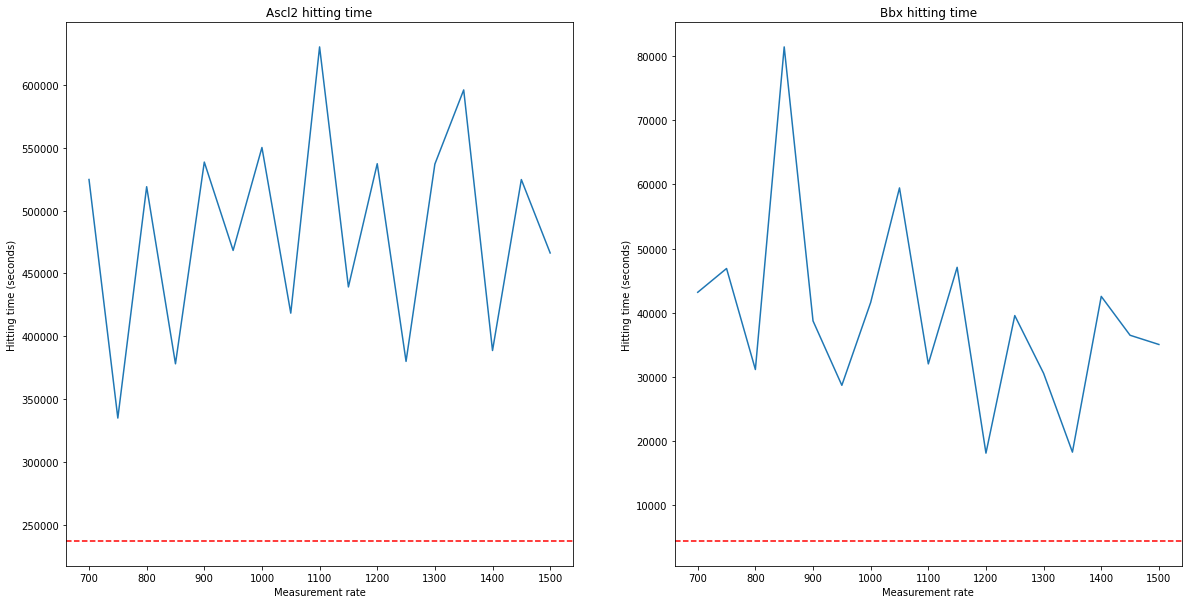

In [ ]:
plt.figure(figsize=(20,10))

for i, phen in enumerate(['Ascl2', 'Bbx']):
  plt.subplot(1,2,i+1)

  plt.plot(comparing_results.iloc[:-1]['measurement_rate'], comparing_results.iloc[:-1][f'tau_{phen} promedio'])
  plt.title(f'{phen} hitting time')
  plt.axhline(y=comparing_results[f'tau_{phen} promedio'][len(comparing_results)-1], color='red', linestyle='--', label='Classical walk')
  plt.xlabel('Measurement rate')
  plt.ylabel('Hitting time (seconds)')

Text(0, 0.5, 'Hitting time (seconds)')

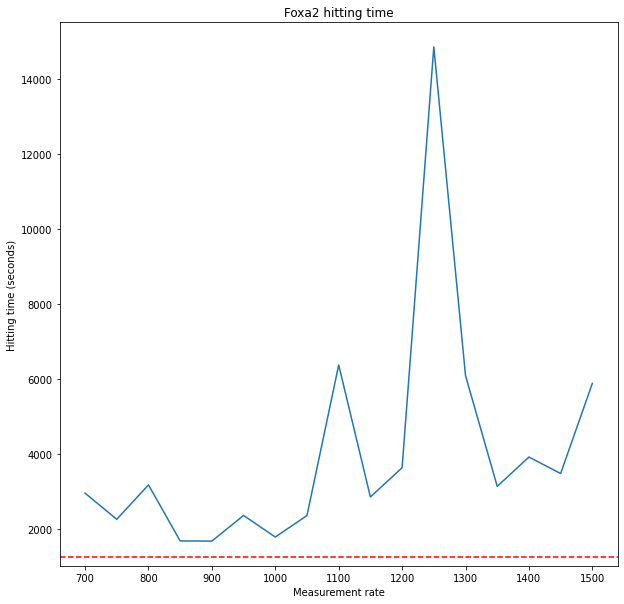

In [ ]:
plt.figure(figsize=(10,10))
phen = 'Foxa2'
plt.plot(comparing_results.iloc[:-1]['measurement_rate'], comparing_results.iloc[:-1][f'tau_{phen} promedio'])
plt.title(f'{phen} hitting time')
plt.axhline(y=comparing_results[f'tau_{phen} promedio'][len(comparing_results)-1], color='red', linestyle='--', label='Classical walk')
plt.xlabel('Measurement rate')
plt.ylabel('Hitting time (seconds)')

In [ ]:
plt.savefig(url_data_visualization+f"Measurement rate vs hitting time (init {initial_genotype}).png")

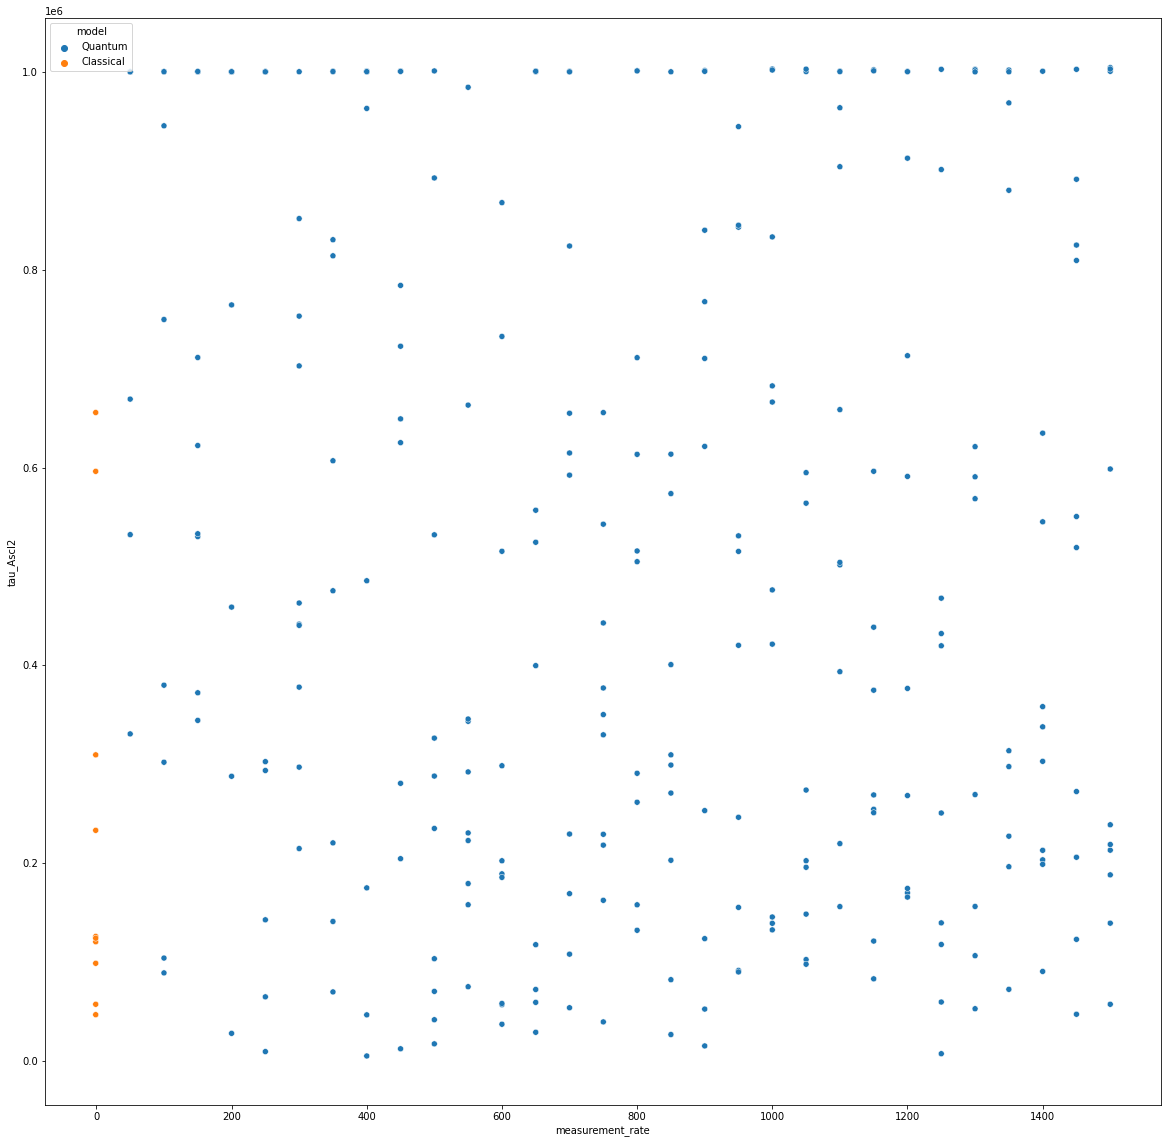

In [ ]:
plt.figure(figsize=(20,20))
phen = 'Ascl2'

sns.scatterplot(x='measurement_rate', y=f'tau_{phen}', hue='model', data=comparing_results_all)

<Figure size 576x576 with 0 Axes>

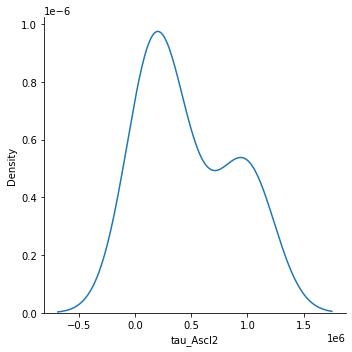

In [ ]:
plt.figure(figsize=(8, 8))
#title = f"Simulation time ({resolution}) of both models"
#g.set(title=title)
sns.displot(x=f"tau_{phen}", data=simulations_results[(simulations_results['parameters_index'] == parameters_index)], kind="kde")
# plt.tick_params(axis='x', labelrotation=45)

#plt.show()

In [ ]:
plt.savefig(url_data_visualization+title+' ('+str(datetime.datetime.now())[:19]+')', bbox_inches = 'tight')

We need to compute $$\mathbb{P}[S_1 = v | S_0 = u] = \mathbb{E}[p_{u,v}^T] = \mathbb{E}[|\langle v |  exp(-iTH) |u\rangle|^2],$$ where $T$ is an exponential random variable with mean equal to the measurement rate (time between measurements).

In [ ]:
def computeTransitionMatrixOfMeasurements(gspace, measurement_rate, L):
  times = expon.rvs(scale=measurement_rate, size=L) 
  
  for u in gspace.nodes:
    for v in gspace.nodes:

# Comparison of both models

## Estimations (deprecated)

In [ ]:
def updateEstimation(parameters_index):
  estimations_results['tau_prom (seconds)'][index] =  simulations_results[simulations_results['parameters_index'] == index]['tau'].mean()
  estimations_results['tau_prom (days)'][index] = estimations_results['tau_prom (seconds)'][index]/(60*24)
  # 60*24 is the number of seconds in a day
  estimations_results['N_prom'][index] = simulations_results[simulations_results['parameters_index'] == index]['N'].mean()

def updateAllEstimations():
  estimations_results = pd.DataFrame(columns=['tau_prom (seconds)', 'tau_prom (days)', 'N_prom'])

  for index, row in parameters.iterrows():
    estimation_result_aux = {}
    estimation_result_aux['tau_prom (seconds)'] =  simulations_results[simulations_results['parameters_index'] == index]['tau'].mean()
    estimation_result_aux['tau_prom (days)'] = estimation_result_aux['tau_prom (seconds)']/(60*24)
    # 60*24 is the number of seconds in a day
    estimation_result_aux['N_prom'] = simulations_results[simulations_results['parameters_index'] == index]['N'].mean()


    estimations_results = estimations_results.append(estimation_result_aux, ignore_index=True)

  return estimations_results


In [ ]:
estimations_results = updateAllEstimations()

In [ ]:
estimations_results

,tau_prom (seconds),tau_prom (days),N_prom
0,4.635340e+05,321.898631,5854.000000
1,1.401699e+06,973.401744,17517.752381
2,9.499409e+05,659.681194,11872.990000
3,3.784746e+06,2628.295600,25212.690000
4,4.990389e+05,346.554792,49896.210000
5,1.000163e+05,69.455766,100000.000000
6,1.026799e+04,7.130547,1000.000000
7,8.269004e+04,57.423636,1648.400000
8,2.481227e+05,172.307409,5000.000000
9,2.115363e+05,146.900222,4214.400000


In [ ]:
estimations_results.to_csv("/content/drive/My Drive/Thesis/Code/newData/paperBased/gspace_4phen/CTQW_estimation_results.csv")

## Comparing

### Variables

In [ ]:
simulations = 10
last_simulations = simulations_results.tail(simulations)
last_simulations_c = simulations_results_c.tail(simulations)
resolution = "minutes"
resolution_time = 60 # number of seconds in a day, hour, etc.

In [ ]:
last_simulations['simulation time'].describe()

count    1.000000e+01
mean     1.000792e+06
std      5.049520e+02
min      1.000130e+06
25%      1.000505e+06
50%      1.000670e+06
75%      1.001060e+06
max      1.001888e+06
Name: simulation time, dtype: float64

In [ ]:
last_simulations_c['simulation time'].describe()

count    1.000000e+01
mean     1.000265e+06
std      4.630761e+02
min      1.000019e+06
25%      1.000053e+06
50%      1.000074e+06
75%      1.000193e+06
max      1.001542e+06
Name: simulation time, dtype: float64

### Compute mutation time in quantum model

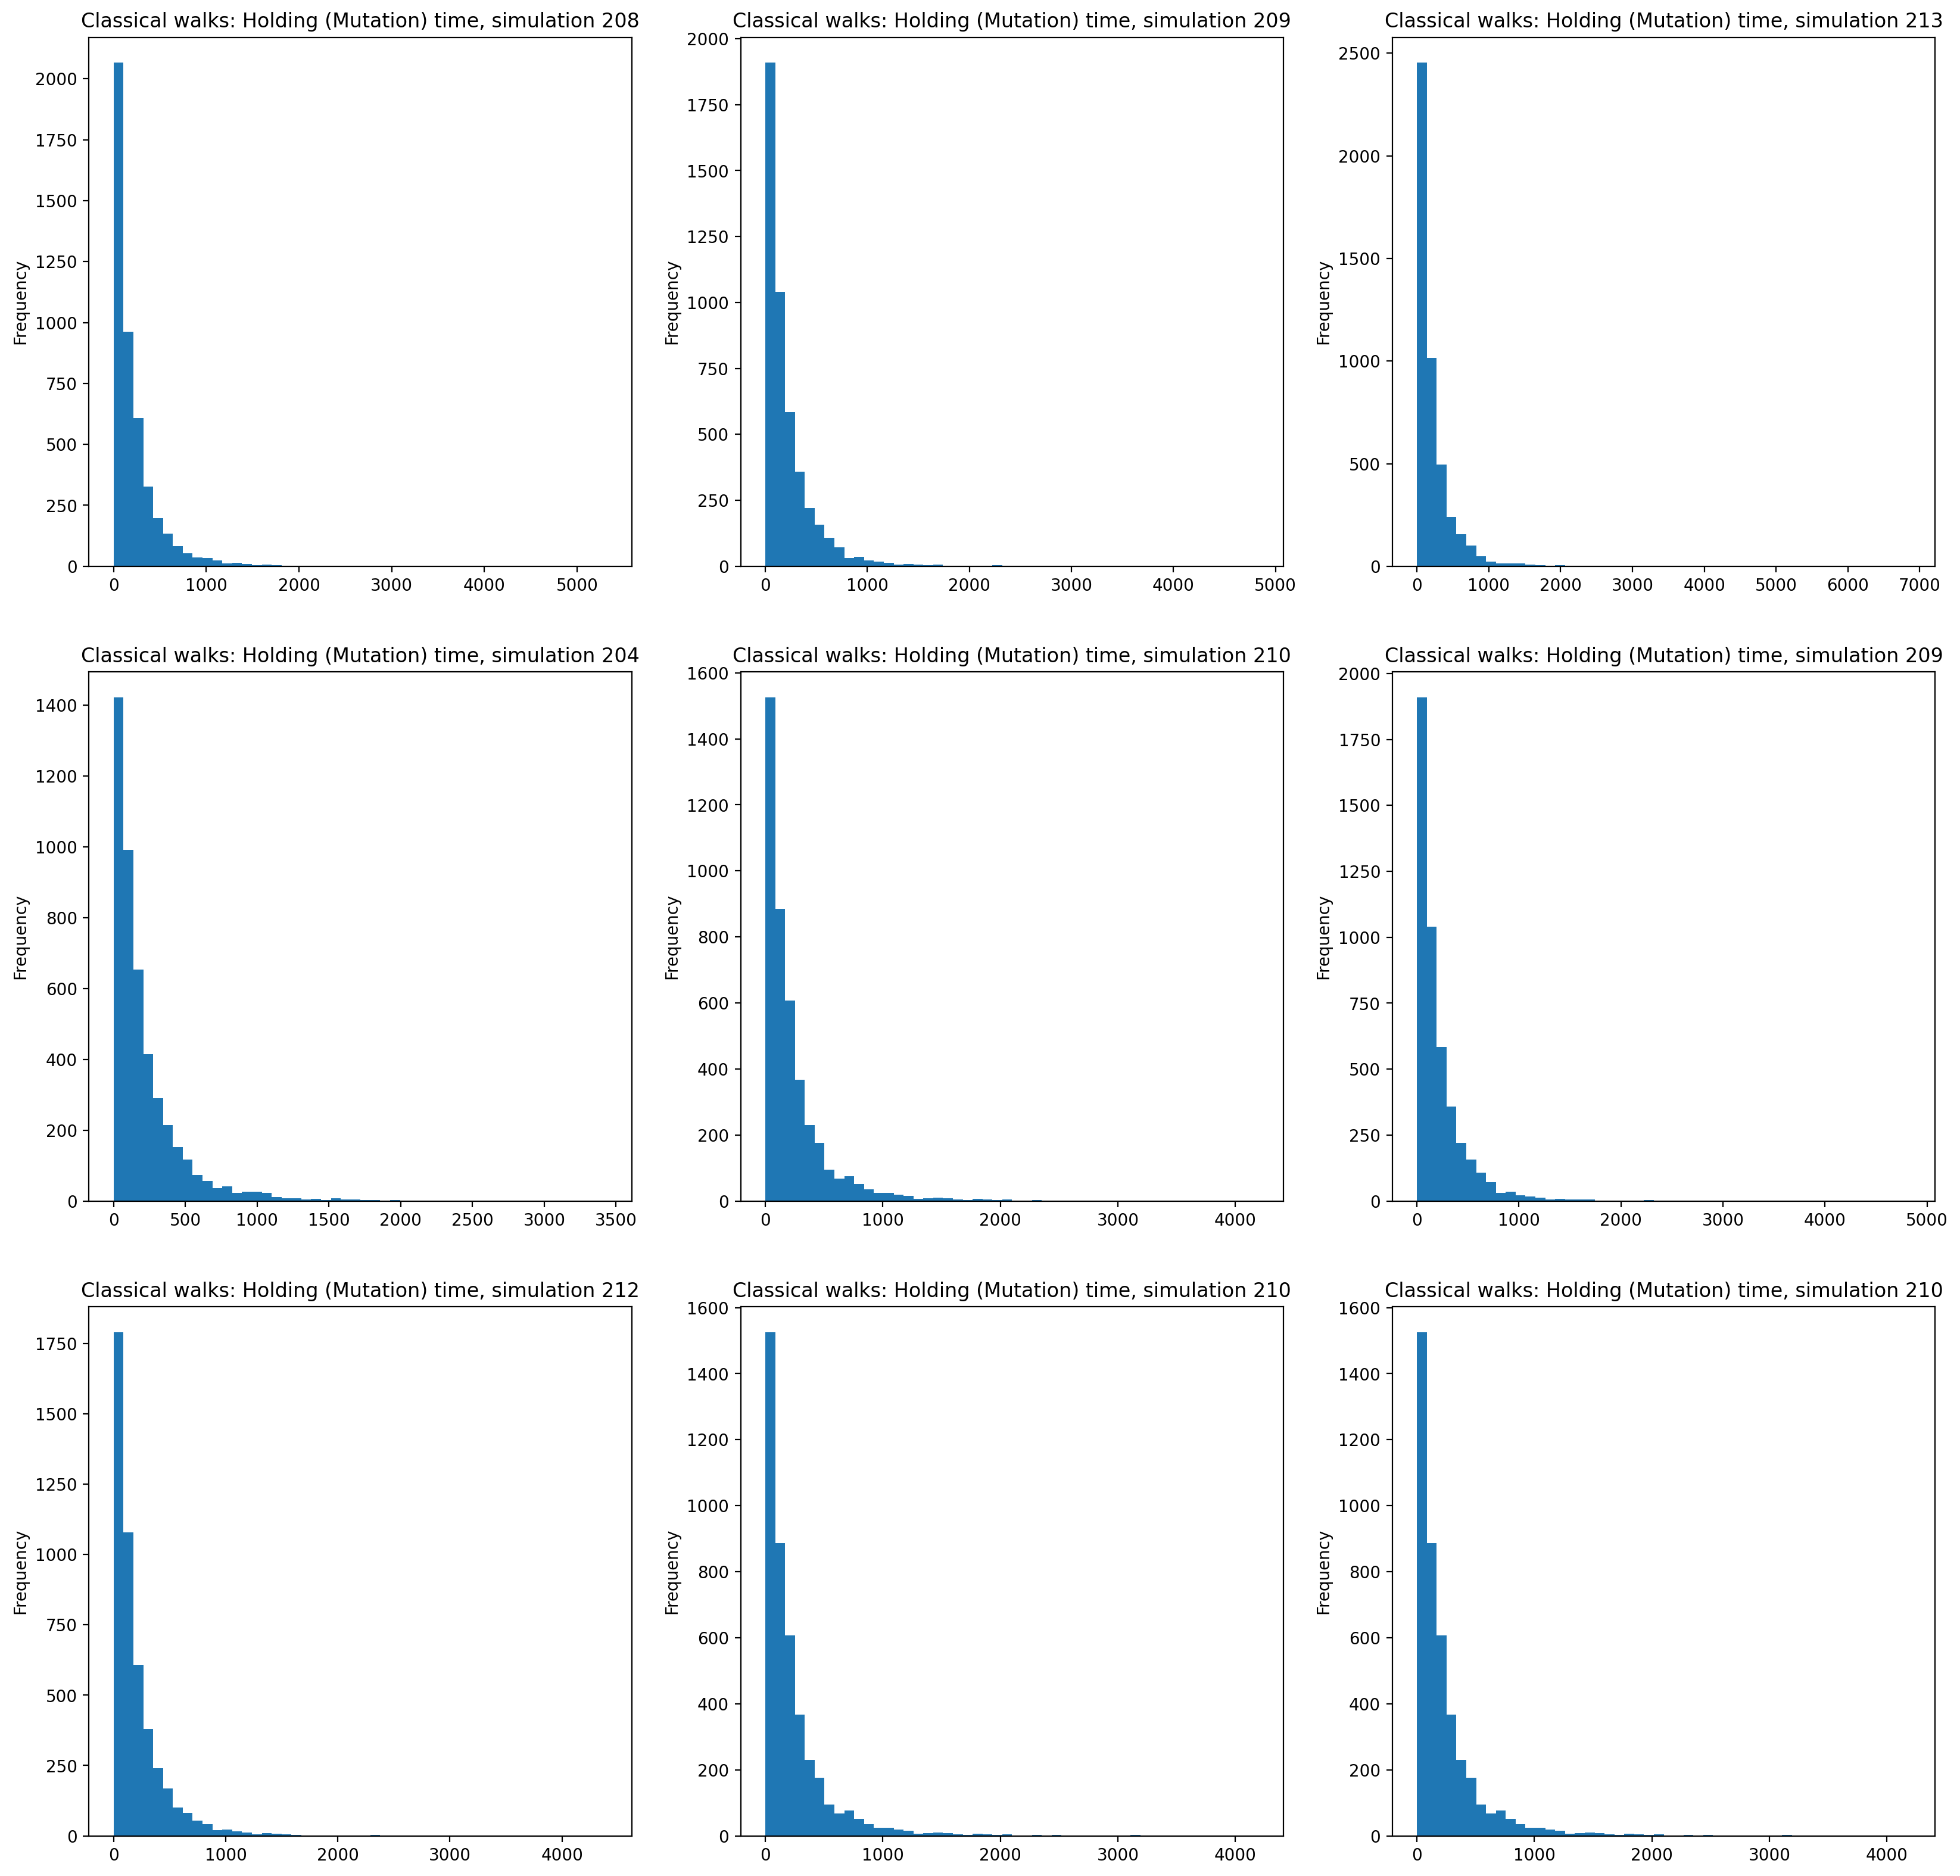

In [ ]:
plt.figure(figsize=(20,20), dpi=200)
np.random.seed(2021)

for i in range(9):
  simulation_index = np.random.choice(list(evolution_paths_c.keys()))
  plt.subplot(3,3,i+1)
  plt.title("Classical walks: Holding (Mutation) time, simulation "+str(simulation_index))
  evolution_paths_c[simulation_index]['holding time'].plot(kind="hist", bins=50)

plt.show()

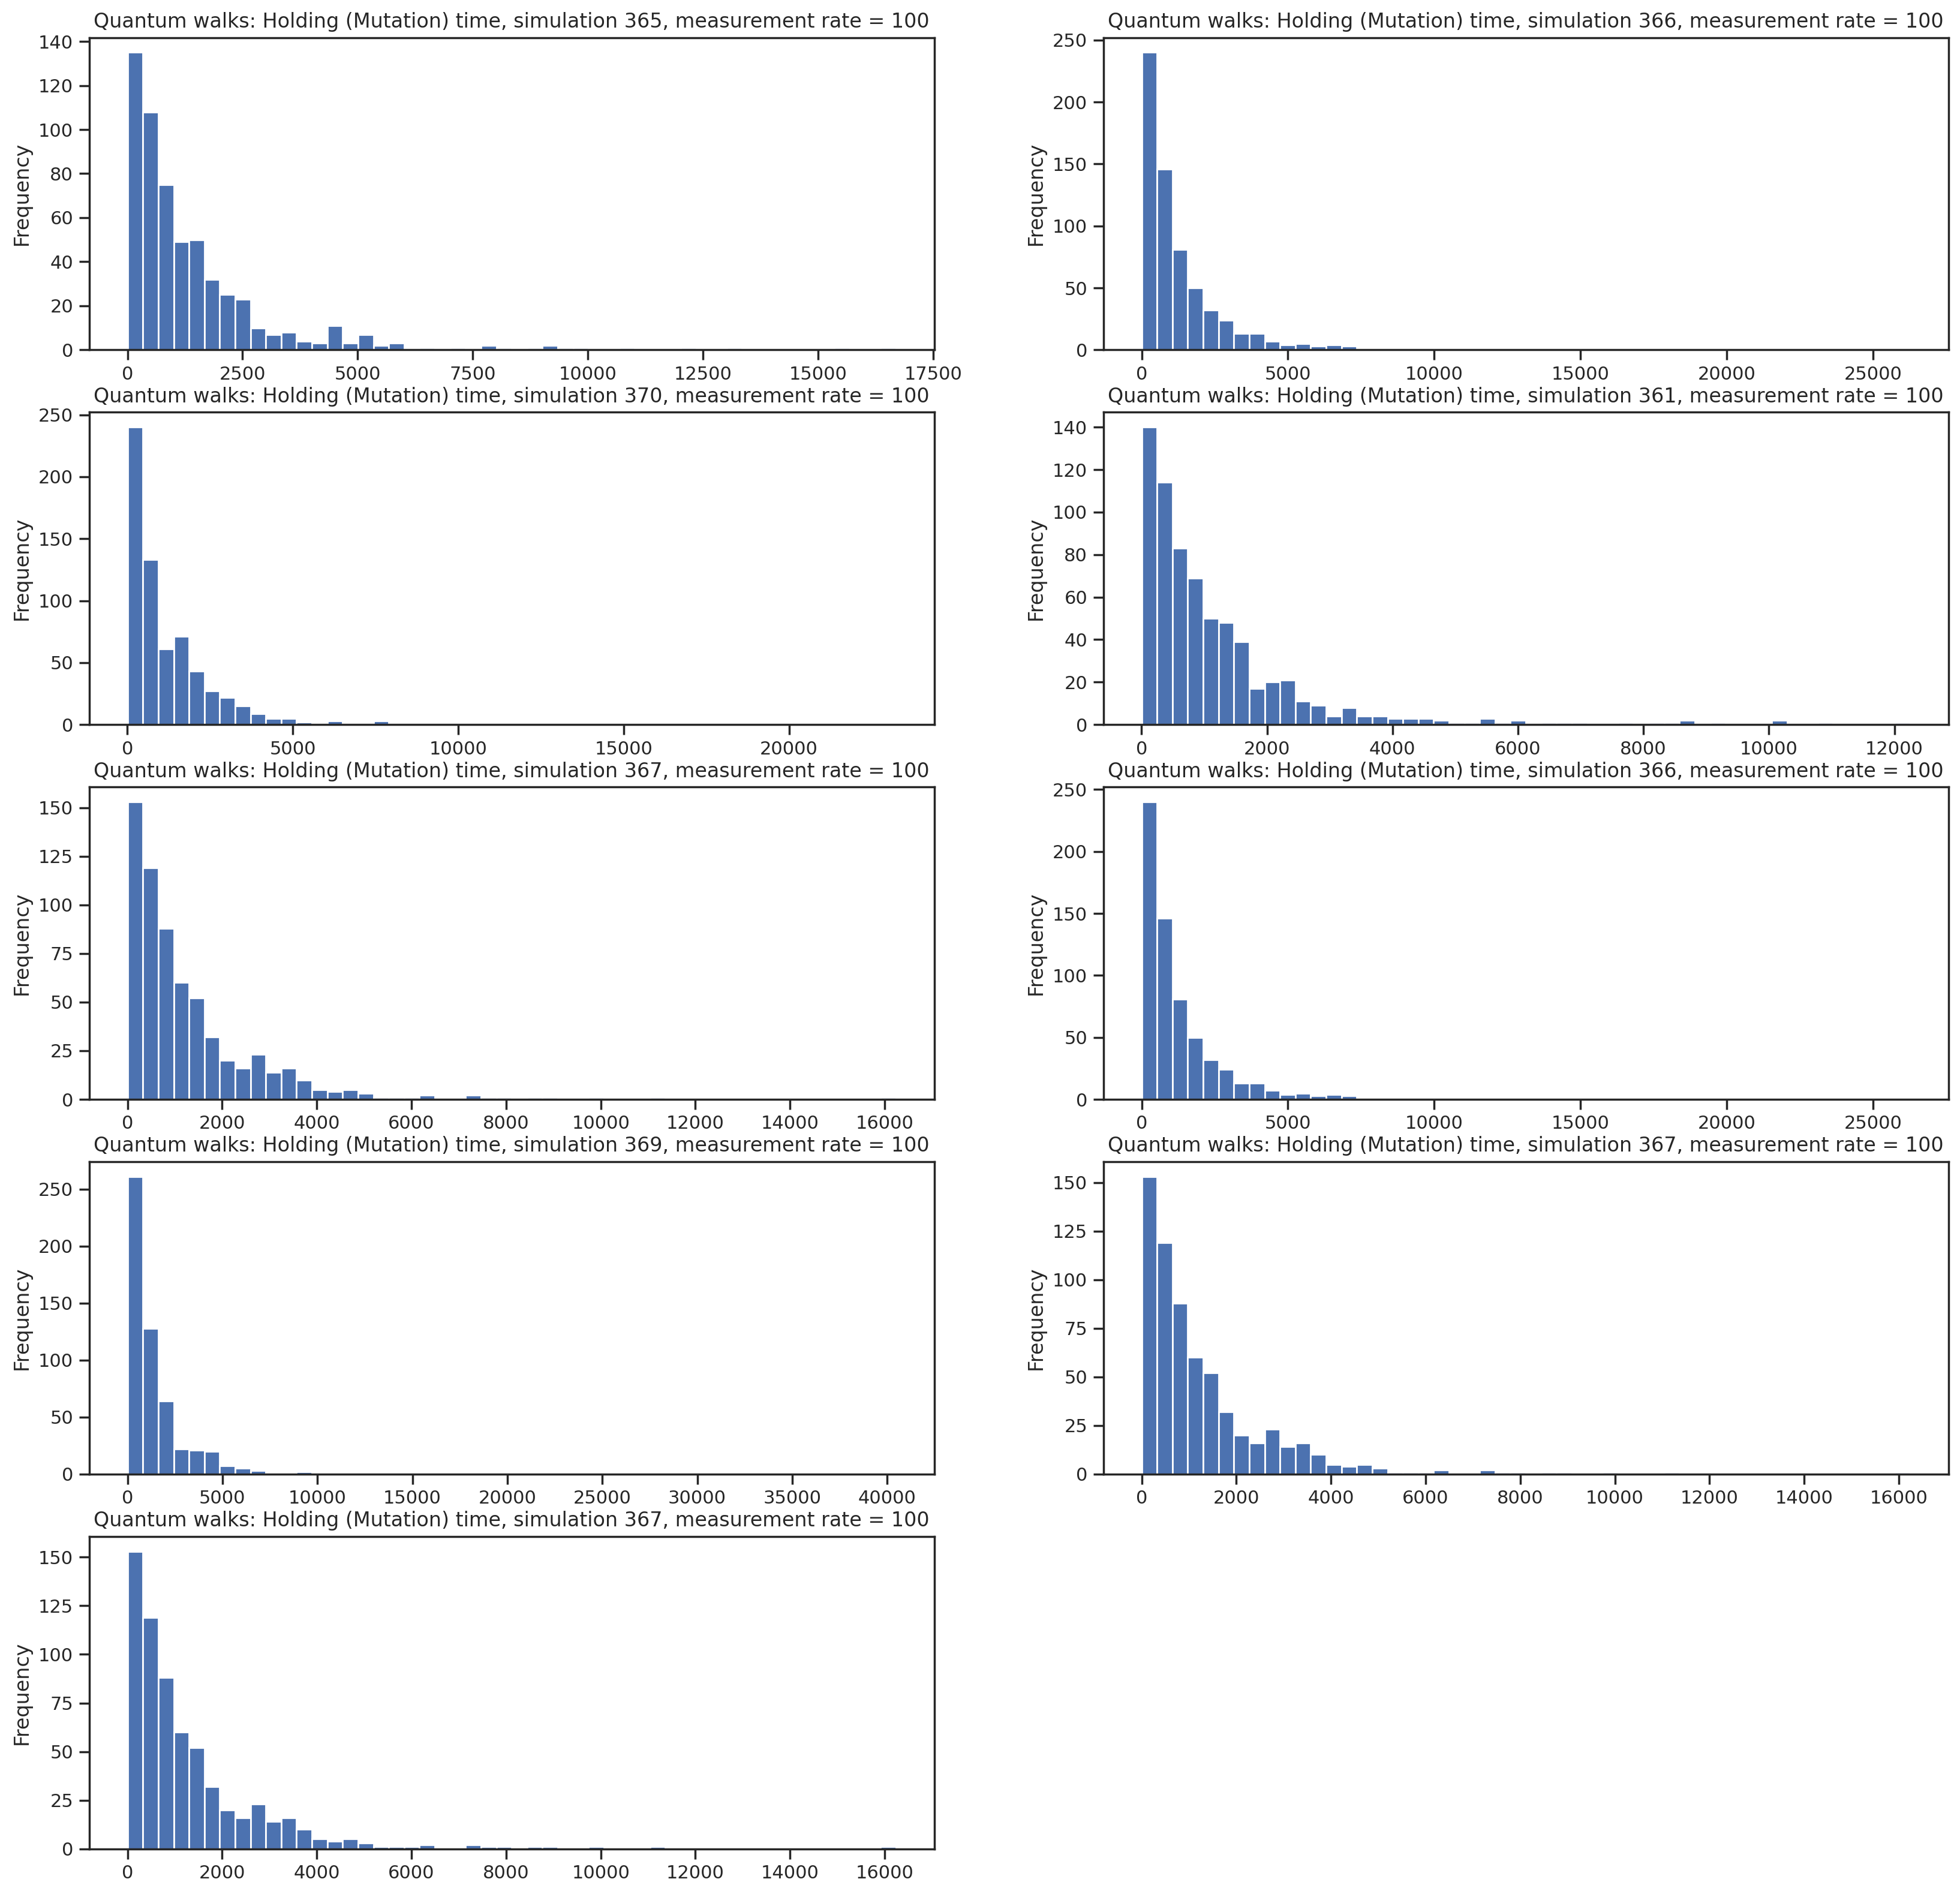

In [ ]:
plt.figure(figsize=(20,20), dpi=200)
np.random.seed(2021)

for i in range(9):
  simulation_index = np.random.choice(list(evolution_paths.keys()))
  plt.subplot(5,2,i+1)
  plt.title("Quantum walks: Holding (Mutation) time, simulation "+str(simulation_index)+", measurement rate = "+str(measurement_rate))
  evolution_paths[simulation_index][evolution_paths[simulation_index]['mutation time']>0]['mutation time'].plot(kind="hist", bins=50)

plt.show()

In [ ]:
plt.figure(figsize=(20,20), dpi=200)
np.random.seed(2021)
indices = range(351, 361)

for i in range(9):
  simulation_index = indices[i]
  plt.subplot(5,2,i+1)
  plt.title("Quantum walks: Holding (Mutation) time, simulation "+str(simulation_index)+", measurement rate = "+str(parameters['measurement_rate'][len(parameters)-2]))
  evolution_paths[simulation_index][evolution_paths[simulation_index]['mutation time']>0]['mutation time'].plot(kind="hist", bins=50)

plt.show()

### Comparison of simulation times

In [ ]:
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
simulation_times = pd.DataFrame(columns=['model', 'simulation time'])

for i in last_simulations.index:
  simulation_times = simulation_times.append({'model': 'quantum', 'simulation time': 
                          simulations_results['simulation time'][i]/resolution_time}, ignore_index=True)

for i in last_simulations_c.index:
  simulation_times = simulation_times.append({'model': 'classical', 'simulation time': 
                          simulations_results_c['simulation time'][i]/resolution_time}, ignore_index=True)

In [ ]:
#plt.figure(figsize=(15,10), dpi=60)
title = f"Simulation time ({resolution}) of both models"
g = sns.displot(x=f'simulation time', hue="model", data=simulation_times, kind="kde")
g.set(title=title)
plt.tick_params(axis='x', labelrotation=45)
plt.savefig(url_data_visualization+title+' ('+str(datetime.datetime.now())[:19]+')', bbox_inches = 'tight')
plt.show(g)

### Comparison of hitting times

In [ ]:
parameters.tail(5)

,initial_phen,initial_gen,initial_gen_index,max_measurements,measurement_rate,transition_rate,max_simulation_time
264,Mafb,ACCAAAAA,511,-1.0,1400.0,0.001,1000000
265,Mafb,ACCAAAAA,511,-1.0,1450.0,0.001,1000000
266,Mafb,ACCAAAAA,511,-1.0,1500.0,0.001,1000000
267,Bbx,TTCATGAA,116,-1.0,600.0,0.001,1000000
268,Bbx,TTCATGAA,116,-1.0,650.0,0.001,1000000


In [ ]:
all_measuremente_rates = list(set(parameters[(parameters['max_simulation_time'] > 0) & (parameters['initial_gen_index']!=511)]['measurement_rate']))
all_measuremente_rates.sort()
all_measuremente_rates

[50.0, 100.0, 200.0, 500.0, 600.0, 650.0, 1000.0]

In [ ]:
initial_genotypes = set(parameters[(parameters['max_simulation_time'] > 0) & (parameters['initial_gen_index']!=511)]['initial_gen_index'])

In [ ]:
for init in initial_genotypes:
  print(f"simulations with initial genotype {init}: {len(parameters[parameters['initial_gen_index'] == init])}")

simulations with initial genotype 0: 8
simulations with initial genotype 3: 1
simulations with initial genotype 517: 1
simulations with initial genotype 5: 1
simulations with initial genotype 520: 1
simulations with initial genotype 10: 1
simulations with initial genotype 14: 1
simulations with initial genotype 533: 1
simulations with initial genotype 24: 1
simulations with initial genotype 25: 3
simulations with initial genotype 544: 1
simulations with initial genotype 545: 1
simulations with initial genotype 546: 1
simulations with initial genotype 554: 1
simulations with initial genotype 556: 1
simulations with initial genotype 44: 2
simulations with initial genotype 558: 2
simulations with initial genotype 559: 1
simulations with initial genotype 48: 1
simulations with initial genotype 49: 1
simulations with initial genotype 561: 1
simulations with initial genotype 563: 1
simulations with initial genotype 57: 2
simulations with initial genotype 61: 1
simulations with initial genoty

In [ ]:
results = simulations_results[simulations_results['parameters_index'].isin(parameters[(parameters['max_simulation_time'] > 0) & (parameters['initial_gen_index']!=511)].index)]

In [ ]:
results

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time,total measurements
221,106.0,3.439895e+05,0.000000,13246.160090,14651.859537,6897.0,0.0,268.0,292.0,1.000009e+06,NaN
222,107.0,1.000018e+06,156016.468732,0.000000,95378.210818,-1.0,3052.0,0.0,1888.0,1.000018e+06,NaN
223,108.0,6.781763e+05,38779.643267,0.000000,53032.830324,13462.0,740.0,0.0,1047.0,1.000007e+06,NaN
224,109.0,1.000029e+06,192806.197492,0.000000,2019.227816,-1.0,3915.0,0.0,41.0,1.000029e+06,NaN
225,110.0,1.000124e+06,70940.161684,0.000000,5090.060077,-1.0,1424.0,0.0,111.0,1.000124e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...
887,268.0,1.000872e+06,0.000000,2496.432204,3270.257232,-1.0,0.0,1.0,2.0,1.000872e+06,1548.0
888,268.0,9.037269e+04,0.000000,9057.292044,5665.935166,142.0,0.0,13.0,9.0,1.001123e+06,1548.0
889,268.0,2.989371e+05,0.000000,1601.538932,1906.548091,430.0,0.0,3.0,4.0,1.000130e+06,1495.0
890,268.0,5.897942e+04,0.000000,3121.778371,1961.610408,98.0,0.0,4.0,2.0,1.000600e+06,1550.0


In [ ]:
initial_genotypes_c = set(parameters_c[(parameters_c['max_simulation_time'] > 0)]['initial_gen_index'])

In [ ]:
for init in initial_genotypes_c:
  print(f"simulations with initial genotype {init}: {len(parameters_c[parameters_c['initial_gen_index'] == init])}")

simulations with initial genotype 128: 1
simulations with initial genotype 257: 1
simulations with initial genotype 0: 1
simulations with initial genotype 264: 2
simulations with initial genotype 136: 2
simulations with initial genotype 395: 2
simulations with initial genotype 396: 1
simulations with initial genotype 269: 2
simulations with initial genotype 18: 2
simulations with initial genotype 533: 3
simulations with initial genotype 278: 4
simulations with initial genotype 535: 2
simulations with initial genotype 280: 2
simulations with initial genotype 152: 1
simulations with initial genotype 410: 1
simulations with initial genotype 545: 1
simulations with initial genotype 554: 2
simulations with initial genotype 44: 1
simulations with initial genotype 57: 1
simulations with initial genotype 193: 2
simulations with initial genotype 198: 1
simulations with initial genotype 455: 2
simulations with initial genotype 70: 4
simulations with initial genotype 341: 1
simulations with initi

In [ ]:
simulations_results_c[simulations_results_c['parameters_index'].isin(parameters_c[parameters_c['max_simulation_time'] > 0].index)]

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time
134,96,52649.291390,0.000000,968.387644,1970.938087,234.0,0.0,2.0,9.0,1.000984e+06
135,97,77506.355206,0.000000,10226.929413,13061.334064,384.0,0.0,19.0,39.0,1.000037e+06
136,98,130583.165263,69501.481527,0.000000,4619.002686,590.0,244.0,0.0,21.0,1.000211e+06
137,99,143988.777798,2107.089767,1009.832438,0.000000,528.0,12.0,3.0,0.0,1.001458e+06
138,100,0.000000,60439.842652,1466.533239,874.187151,0.0,283.0,10.0,5.0,1.000452e+06
...,...,...,...,...,...,...,...,...,...,...
219,157,655630.153751,2040.169697,11.363921,0.000000,3000.0,8.0,1.0,0.0,1.000049e+06
220,157,233239.038754,812.879880,389.975362,0.000000,1179.0,7.0,2.0,0.0,1.001542e+06
221,157,124225.605150,3304.989809,450.164589,0.000000,646.0,13.0,3.0,0.0,1.000019e+06
222,157,46879.972284,17333.227880,344.830066,0.000000,231.0,85.0,5.0,0.0,1.000176e+06


In [ ]:
results_c = simulations_results_c[simulations_results_c['parameters_index'].isin(parameters_c[parameters_c['max_simulation_time'] > 0].index)]

Plotting categorical data with Seaborn ([click here](https://seaborn.pydata.org/tutorial/categorical.html))

In [ ]:
phenotypes

dict_keys(['Ascl2', 'Bbx', 'Foxa2', 'Mafb'])

In [ ]:
analysis = pd.DataFrame(columns=['model', 'simulation index', 'parameters index', 'initial phenotype', 'final phenotype', 'hitting time', 'measurement rate'])

for ind in results.index:
  analysis_aux = {}
  analysis_aux['model'] = 'quantum'
  analysis_aux['simulation index'] = ind
  analysis_aux['parameters index'] = results['parameters_index'][ind]
  analysis_aux['initial phenotype'] = parameters['initial_phen'][analysis_aux['parameters index']]
  
  for phen in phenotypes:
    hitting_time_phen = results['tau_'+phen][ind]

    analysis_aux['final phenotype'] = phen
    analysis_aux['hitting time'] = hitting_time_phen
    analysis_aux['measurement rate'] = parameters['measurement_rate'][analysis_aux['parameters index']]
    
    analysis = analysis.append(analysis_aux, ignore_index=True)

In [ ]:
for ind in results_c.index:
  analysis_aux = {}
  analysis_aux['model'] = 'classical'
  analysis_aux['simulation index'] = ind
  analysis_aux['parameters index'] = results_c['parameters_index'][ind]
  analysis_aux['initial phenotype'] = parameters_c['initial_phen'][analysis_aux['parameters index']]
  
  for phen in phenotypes:
    hitting_time_phen = results_c['tau_'+phen][ind]

    analysis_aux['final phenotype'] = phen
    analysis_aux['hitting time'] = hitting_time_phen
    analysis_aux['measurement rate'] = -1
    
    analysis = analysis.append(analysis_aux, ignore_index=True)

In [ ]:
analysis

,model,simulation index,parameters index,initial phenotype,final phenotype,hitting time,measurement rate
0,quantum,221,106.0,Bbx,Ascl2,3.439895e+05,50.0
1,quantum,221,106.0,Bbx,Bbx,0.000000e+00,50.0
2,quantum,221,106.0,Bbx,Foxa2,1.324616e+04,50.0
3,quantum,221,106.0,Bbx,Mafb,1.465186e+04,50.0
4,quantum,222,107.0,Foxa2,Ascl2,1.000018e+06,50.0
...,...,...,...,...,...,...,...
899,classical,222,157.0,Mafb,Mafb,0.000000e+00,-1.0
900,classical,223,157.0,Mafb,Ascl2,3.095637e+05,-1.0
901,classical,223,157.0,Mafb,Bbx,1.208168e+03,-1.0
902,classical,223,157.0,Mafb,Foxa2,5.548028e+02,-1.0


In [ ]:
for measurement_rate in all_measuremente_rates:
  print(f"Simulaciones con measurement_rate={measurement_rate}: {len(analysis[((analysis['measurement rate'] == measurement_rate))])}")

Simulaciones con measurement_rate=50.0: 80
Simulaciones con measurement_rate=100.0: 120
Simulaciones con measurement_rate=200.0: 40
Simulaciones con measurement_rate=500.0: 156
Simulaciones con measurement_rate=600.0: 40
Simulaciones con measurement_rate=650.0: 28
Simulaciones con measurement_rate=1000.0: 80


Graph Hitting time vs final phenotype. Each dot is a random simulation which has hitting times to novel phenotypes. The graph shows the kernel density estimation of the hitting times to a given final phenotype and the scatter plot.

In [ ]:
resolution = 'seconds'

<Figure size 1500x600 with 0 Axes>

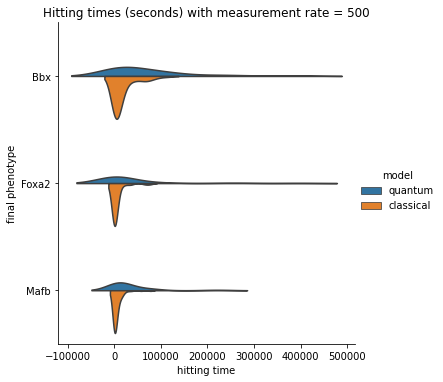

In [ ]:
measurement_rate = 500
df = analysis[((analysis['measurement rate'] == measurement_rate) | (analysis['model'] == 'classical'))] # & (analysis['final phenotype'] != 'Ascl2')]
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="violin", split=True, inner=None, data=df[df['final phenotype'] != 'Ascl2'])
g.set(title=title)
plt.show(g)

### Final phenotypes

#### Final phenotype: Ascl2

<Figure size 1500x600 with 0 Axes>

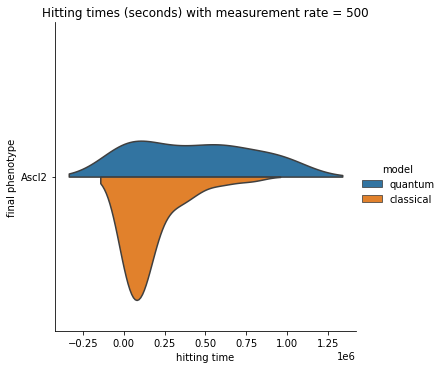

In [ ]:
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="violin", split=True, inner=None, data=df[df['final phenotype'] == 'Ascl2'])
g.set(title=title)
plt.show(g)

<Figure size 1500x600 with 0 Axes>

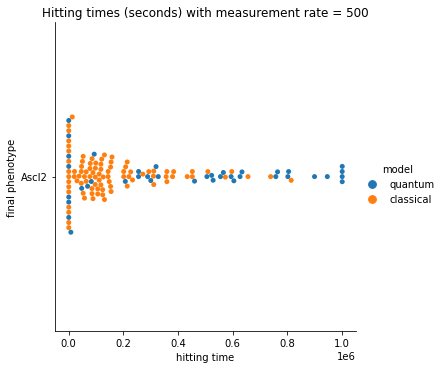

In [ ]:
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="swarm", data=df[(df['final phenotype']=='Ascl2')])
g.set(title=title)
plt.show(g)

#### Final phenotype: Mafb

<Figure size 1500x600 with 0 Axes>

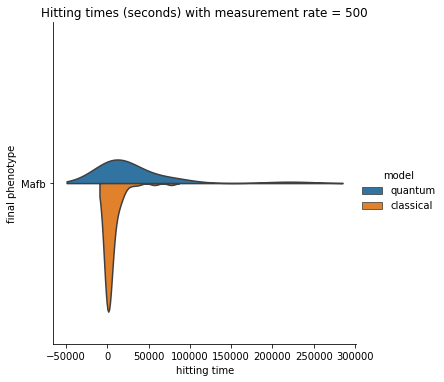

In [ ]:
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="violin", split=True, inner=None, data=df[(df['final phenotype']=='Mafb')])
g.set(title=title)
plt.show(g)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1500x600 with 0 Axes>

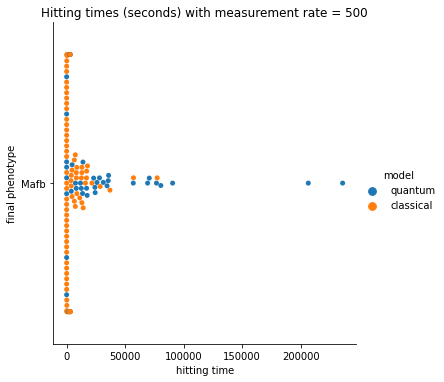

In [ ]:
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="swarm", data=df[(df['final phenotype']=='Mafb')])
g.set(title=title)
plt.show(g)

#### Final phenotype: Foxa2

<Figure size 1500x600 with 0 Axes>

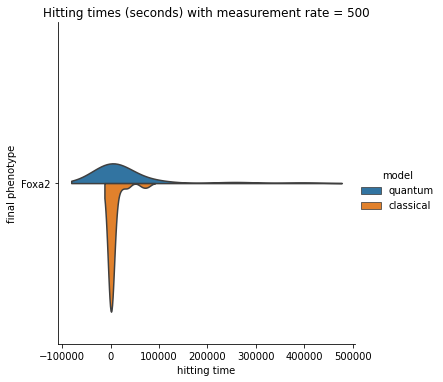

In [ ]:
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="violin", split=True, inner=None, data=df[(df['final phenotype']=='Foxa2')])
g.set(title=title)
plt.show(g)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1500x600 with 0 Axes>

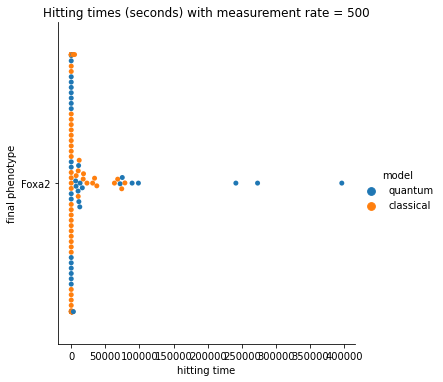

In [ ]:
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="swarm", data=df[(df['final phenotype']=='Foxa2')])
g.set(title=title)
plt.show(g)

#### Final phenotype: Bbx

<Figure size 1500x600 with 0 Axes>

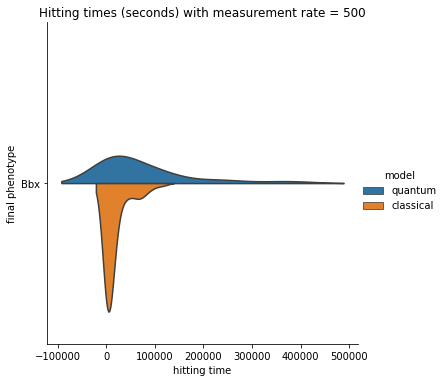

In [ ]:
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="violin", split=True, inner=None, data=df[(df['final phenotype']=='Bbx')])
g.set(title=title)
plt.show(g)

<Figure size 1500x600 with 0 Axes>

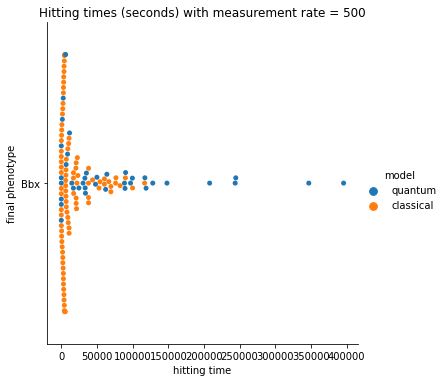

In [ ]:
plt.figure(figsize=(25,10), dpi=60)
title = f"Hitting times ({resolution}) with measurement rate = {measurement_rate}"
g = sns.catplot(x="hitting time", y="final phenotype", hue='model', kind="swarm", data=df[(df['final phenotype']=='Bbx')])
g.set(title=title)
plt.show(g)

### Others

<Figure size 2160x1440 with 0 Axes>

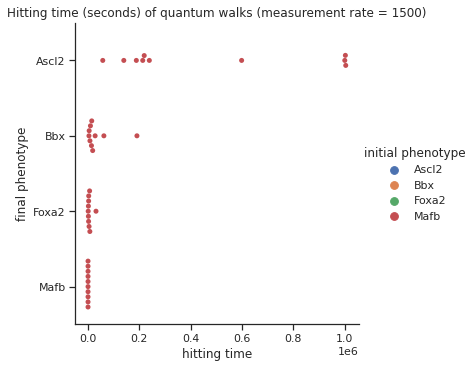

In [ ]:
plt.figure(figsize=(30,20))
title = f"Hitting time ({resolution}) of quantum walks (measurement rate = {measurement_rate})"
g = sns.catplot(kind="swarm", x="hitting time", y="final phenotype", hue='initial phenotype',
                data=df[(df['model'] == 'quantum')], hue_order=phenotypes)
g.set(title=title)
plt.show(g)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1600x800 with 0 Axes>

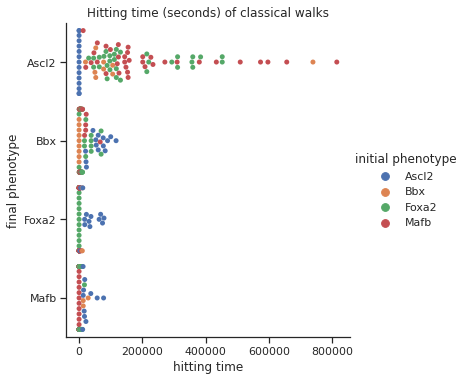

In [ ]:
plt.figure(figsize=(20,10), dpi=80)
title = f"Hitting time ({resolution}) of classical walks"
g = sns.catplot(kind="swarm", x="hitting time", y="final phenotype", hue='initial phenotype', 
      data=df[df['model'] == 'classical'], hue_order=phenotypes)
g.set(title=title)
plt.show(g)

In [ ]:
simulations_results_c.tail(10)

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time
219,157.0,655630.153751,2.040170e+03,1.136392e+01,0.000000e+00,3000.0,8.0,1.0,0.0,1.000049e+06
220,157.0,233239.038754,8.128799e+02,3.899754e+02,0.000000e+00,1179.0,7.0,2.0,0.0,1.001542e+06
221,157.0,124225.605150,3.304990e+03,4.501646e+02,0.000000e+00,646.0,13.0,3.0,0.0,1.000019e+06
222,157.0,46879.972284,1.733323e+04,3.448301e+02,0.000000e+00,231.0,85.0,5.0,0.0,1.000176e+06
223,157.0,309563.692906,1.208168e+03,5.548028e+02,0.000000e+00,1704.0,8.0,3.0,0.0,1.000081e+06
224,158.0,0.000000,1.943555e+06,1.943555e+06,1.943555e+06,0.0,-1.0,-1.0,-1.0,1.943555e+06
225,158.0,0.000000,1.254805e+06,1.254805e+06,1.254805e+06,0.0,-1.0,-1.0,-1.0,1.254805e+06
226,158.0,0.000000,1.111521e+06,1.111521e+06,1.111521e+06,0.0,-1.0,-1.0,-1.0,1.111521e+06
227,158.0,0.000000,1.317608e+06,1.317608e+06,1.317608e+06,0.0,-1.0,-1.0,-1.0,1.317608e+06
228,158.0,0.000000,1.115135e+06,1.115135e+06,1.115135e+06,0.0,-1.0,-1.0,-1.0,1.115135e+06


In [ ]:
evolution_paths_c[evolution_paths_c['simulation id'].isin([224, 225, 226, 227, 228])]

,simulation id,no. jump,holding time,accumulated time,genotype index,genotype sequence,Ascl2 freq.,Bbx freq.,Foxa2 freq.,Mafb freq.
1094557,224,0,0.000000e+00,0.000000e+00,0,GCATATGC,1.0,0.0,0.0,0.0
1094558,224,1,9.313492e+05,9.313492e+05,66,GCAGATGC,1.0,0.0,0.0,0.0
1094559,224,2,2.991988e+04,9.612691e+05,31,ACAGATGC,1.0,0.0,0.0,0.0
1094560,224,3,9.822857e+05,1.943555e+06,5,ACAGGTGC,1.0,0.0,0.0,0.0
1094561,225,0,0.000000e+00,0.000000e+00,0,GCATATGC,1.0,0.0,0.0,0.0
1094562,225,1,1.972238e+05,1.972238e+05,66,GCAGATGC,1.0,0.0,0.0,0.0
1094563,225,2,2.170369e+05,4.142607e+05,54,GCAGCTGC,1.0,0.0,0.0,0.0
1094564,225,3,2.038316e+04,4.346438e+05,1,GCACCTGC,1.0,0.0,0.0,0.0
1094565,225,4,8.201611e+05,1.254805e+06,37,ACACCTGC,1.0,0.0,0.0,0.0
1094566,226,0,0.000000e+00,0.000000e+00,0,GCATATGC,1.0,0.0,0.0,0.0


In [ ]:
simulations_results.tail(10)

,parameters_index,tau_Ascl2,tau_Bbx,tau_Foxa2,tau_Mafb,N_Ascl2,N_Bbx,N_Foxa2,N_Mafb,simulation time,total measurements
887,268.0,1.000872e+06,0.000000,2496.432204,3270.257232,-1.0,0.0,1.0,2.0,1.000872e+06,1548.0
888,268.0,9.037269e+04,0.000000,9057.292044,5665.935166,142.0,0.0,13.0,9.0,1.001123e+06,1548.0
889,268.0,2.989371e+05,0.000000,1601.538932,1906.548091,430.0,0.0,3.0,4.0,1.000130e+06,1495.0
890,268.0,5.897942e+04,0.000000,3121.778371,1961.610408,98.0,0.0,4.0,2.0,1.000600e+06,1550.0
891,268.0,2.645461e+05,0.000000,4465.710639,2745.894690,417.0,0.0,8.0,5.0,1.000357e+06,1622.0
892,271.0,0.000000e+00,224470.494858,48267.763620,41934.386100,0.0,4458.0,971.0,858.0,1.000024e+06,19980.0
893,271.0,0.000000e+00,178687.402908,118865.185069,117985.303254,0.0,3613.0,2409.0,2390.0,1.000018e+06,20172.0
894,271.0,0.000000e+00,205373.210562,139350.725748,116410.727245,0.0,4090.0,2765.0,2324.0,1.000069e+06,19853.0
895,271.0,0.000000e+00,70978.209049,69579.179602,67582.566079,0.0,1364.0,1336.0,1304.0,1.000003e+06,19910.0
896,271.0,0.000000e+00,512355.582760,507707.750722,236366.087738,0.0,10127.0,10018.0,4642.0,1.000039e+06,19779.0
